In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
import statsmodels.formula.api as smf 
from sklearn.preprocessing import scale, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, mean_squared_error
from sklearn import tree 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from warnings import filterwarnings
filterwarnings('ignore')

ModuleNotFoundError: No module named 'xgboost'

In [4]:
data= pd.read_excel( 'HW_Data_Set.xlsx', sheet_name = 'Sheet1')
print(data.head())

   ind_5  ind_6  ind_8      ind_9     ind_10     ind_12     ind_13  ind_14  \
0     19     17  100.0  85.714286  14.285714  72.363515  60.808814   23.80   
1     24     19  100.0  78.571429  21.428571  74.275883  64.366798   11.45   
2     30     24  100.0  71.428571  28.571429  75.140402  65.915803    8.75   
3     37     30  100.0  64.285714  35.714286  76.677846  68.584234    7.80   
4     41     37  100.0  57.142857  42.857143  81.603007  76.455495   14.90   

   ind_15  ind_16  ...  ind_416  ind_418  ind_420  ind_422  ind_424   ind_426  \
0   17.62   11.73  ...    -49.6      -54     -152     -353      1.0  0.498547   
1   18.16   12.22  ...    -55.6      -60     -158     -359      1.0  0.537088   
2   17.86   12.28  ...    -58.4      -60     -160     -362      1.0  0.615169   
3   14.76   12.61  ...    -61.8      -65     -166     -367      1.0  0.661517   
4   11.92   14.25  ...    -79.8      -86     -186     -388      1.0  0.747204   

    ind_428  20_target  50_target  90_target

In [5]:
df=data.copy()

In [6]:
colum=df.columns

num_cols=df._get_numeric_data().columns
CAT=set(colum)-set(num_cols)
CAT

{'ind_109', 'ind_420', 'ind_422'}

In [7]:
dms= pd.get_dummies(df['ind_109'])
dms.head()
X_=df.drop(['ind_109'],axis=1)
X_.head()
df=pd.concat([X_,dms], axis=1)

In [8]:
df=df.replace('?',np.nan)
df = df.dropna(axis=0, subset=['ind_420'])
df = df.dropna(axis=0, subset=['ind_422'])

In [45]:
corr=df.corr()
corr['90_target'].iloc[:][corr['90_target']>=0.1]

ind_16       0.112978
ind_17       0.131409
ind_18       0.142171
ind_77       0.107244
ind_332      0.104910
ind_412      0.134286
20_target    0.344982
50_target    0.935970
90_target    1.000000
Name: 90_target, dtype: float64

# CART ALGORİTMASI

Decision Tree Algoritmalarından biridir. Nümerik ve Kategorik değişkenler için kullanılabilir.
Algoritma 3 temel adımdan oluşur.
1) maksimum ağaç oluşturmak
Burada amaç en iyi kırılmayı elde etmektir.2 algoritma kullanılır.
1.1) GINI: Amaç her adımda en büyük veri kümesini elde etmek.Bölmeden sonra ilgilenmediğimiz kısım izole edilir.
1.2) TWOING: GINI'ye göre daha dengelidir. Her seferinde ana ve yavru düğümlerin %50'sini içermeye çalışır.
2) Ağaç derinliği belirlemek
3) Test verilerini ağaca uygulamak
*Avantajı; Parametrik değildir , Gürültülü verilerle çalışılabilir , Sınıflandırma ve Regresyon için kullanılabilir.
*Dezavantajı; Overfitting poblemi ortaya çıkabilir.Bu sorunu önlemek için karmaşıklık(ceza) parametresi belirlenir ve ağaç budanır.
Bu algoritma başka veri kümelerinde kullanılmak üzere genellenecekse aşırı öğrenme sorunuyla karşı karşıya kalınabilir ancak belirli veri seti ile kullanılacaksa başarılı bir algoritmadır

In [9]:
#kullandığımız kütüphane 
from sklearn.tree import DecisionTreeRegressor

In [10]:
y=df['90_target']
X=df.drop(['20_target','50_target','90_target'],axis=1)
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,GREEN,RED
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,2.0,-49.6,-54,-152.0,-353.0,1.0,0.498547,0.701906,1,0
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.8,-55.6,-60,-158.0,-359.0,1.0,0.537088,0.690833,1,0
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,2.7,-58.4,-60,-160.0,-362.0,1.0,0.615169,0.693040,1,0
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.9,-61.8,-65,-166.0,-367.0,1.0,0.661517,0.673418,1,0
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.1,-79.8,-86,-186.0,-388.0,1.0,0.747204,0.700522,1,0


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (3844, 134)
y_train (3844,)
X_test (1282, 134)
y_test (1282,)
training (5126, 137)


In [12]:
# ilk olarak hedef değişken ile en yüksek korelasyona sahip olan ind_18 değişkeni arasında model kuralım.
X_train = pd.DataFrame(X_train["ind_18"])
X_test = pd.DataFrame(X_test["ind_18"])

MODEL

In [13]:
cart_model=DecisionTreeRegressor()

In [57]:
cart_model
#burada max_depth> Ağaç derinliği , max_leaf_nodes > Max.dallanma

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [58]:
#ind_18 değişkenini train ve test olarak ayırmıştım bu değişken üzerine model fit ettik.
cart_model.fit(X_train ,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

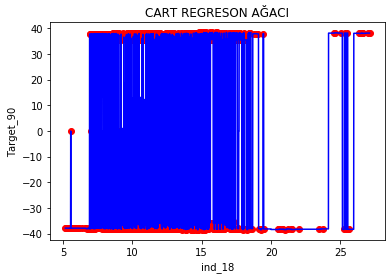

In [59]:
#Görselleştirme

X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01) 
X_grid = X_grid.reshape((len(X_grid), 1))  
plt.scatter(X_train, y_train, color = 'red') 
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')  
plt.title('CART REGRESON AĞACI')  
plt.xlabel('ind_18') 
plt.ylabel('Target_90') ;

In [1]:
from sklearn import tree
tree.plot_tree(cart_model)
figure.figsize(20,20);

NameError: name 'cart_model' is not defined

In [60]:
y_pred= cart_model.predict(X_train)

In [61]:
#model hatası
np.sqrt(mean_squared_error(y_train,y_pred))

22.52638455965085

TAHMİN

In [25]:
!pip install skompiler

In [114]:
!pip install astor

In [115]:
#burada arkada kurduğu modelin python kodunu verir bize yani biz bu kodla elimize gelen her yeni x'i modelde deneyip canlı tutabiliriz
#modelin canlı sisteme entegrasyonunda bu kod kullanılır.
from skompiler import skompile
print(skompile(cart_model.predict).to('python/code'))

((((((((-37.861275465 if x[0] <= 5.263750076293945 else -37.86250512) if x[
    0] <= 5.291249990463257 else -37.85543462) if x[0] <= 5.338749885559082
     else (-37.88248696 if x[0] <= 5.3687498569488525 else (-37.87203492 if
    x[0] <= 5.379999876022339 else -37.86557925) if x[0] <= 
    5.4287497997283936 else -37.87818318) if x[0] <= 5.487499952316284 else
    -37.89386123 if x[0] <= 5.5062501430511475 else -37.87510905) if x[0] <=
    5.519999980926514 else (-37.9313656 if x[0] <= 5.537499904632568 else 
    -37.895398295) if x[0] <= 5.548749923706055 else -37.93597679) if x[0] <=
    5.5562498569488525 else 0.0) if x[0] <= 5.568749904632568 else (((
    -37.90400586 if x[0] <= 5.5899999141693115 else -37.89693536) if x[0] <=
    5.602499961853027 else -37.880335065 if x[0] <= 5.618750095367432 else 
    (((((-37.88740556 if x[0] <= 5.646250009536743 else -37.89324641) if x[
    0] <= 5.708750009536743 else -37.9027762) if x[0] <= 5.7587502002716064
     else -37.88187213) if x[

In [122]:
#x=[6]

In [123]:
((((((((-37.861275465 if x[0] <= 5.263750076293945 else -37.86250512) if x[
    0] <= 5.291249990463257 else -37.85543462) if x[0] <= 5.338749885559082
     else (-37.88248696 if x[0] <= 5.3687498569488525 else (-37.87203492 if
    x[0] <= 5.379999876022339 else -37.86557925) if x[0] <= 
    5.4287497997283936 else -37.87818318) if x[0] <= 5.487499952316284 else
    -37.89386123 if x[0] <= 5.5062501430511475 else -37.87510905) if x[0] <=
    5.519999980926514 else (-37.9313656 if x[0] <= 5.537499904632568 else 
    -37.895398295) if x[0] <= 5.548749923706055 else -37.93597679) if x[0] <=
    5.5562498569488525 else 0.0) if x[0] <= 5.568749904632568 else (((
    -37.90400586 if x[0] <= 5.5899999141693115 else -37.89693536) if x[0] <=
    5.602499961853027 else -37.880335065 if x[0] <= 5.618750095367432 else 
    (((((-37.88740556 if x[0] <= 5.646250009536743 else -37.89324641) if x[
    0] <= 5.708750009536743 else -37.9027762) if x[0] <= 5.7587502002716064
     else -37.88187213) if x[0] <= 5.765000104904175 else -37.90339103) if 
    x[0] <= 5.795000076293945 else -37.87603129 if x[0] <= 
    5.823750019073486 else -37.88955745) if x[0] <= 5.829999923706055 else 
    -37.90369844) if x[0] <= 5.8450000286102295 else ((((((-37.878798 if x[
    0] <= 5.858750104904175 else -37.882179545) if x[0] <= 
    5.866250038146973 else (-37.87049785 if x[0] <= 5.8762500286102295 else
    -37.86158288) if x[0] <= 5.882500171661377 else -37.87080527) if x[0] <=
    5.886250019073486 else -37.89386123) if x[0] <= 5.891249895095825 else 
    -37.84944007 if x[0] <= 5.9100000858306885 else -37.87480163) if x[0] <=
    5.927500009536743 else -37.89109452 if x[0] <= 5.9362499713897705 else 
    -37.88310178 if x[0] <= 5.9437501430511475 else -37.87603129) if x[0] <=
    5.96875 else -37.85266791 if x[0] <= 5.9987499713897705 else 
    -37.86557925 if x[0] <= 6.011250019073486 else -37.8643496) if x[0] <= 
    6.076250076293945 else ((-37.89447606 if x[0] <= 6.145000219345093 else
    -37.89570571) if x[0] <= 6.255000114440918 else -37.89324641) if x[0] <=
    6.460000038146973 else -37.84559741 if x[0] <= 6.598750114440918 else 
    -37.8883278) if x[0] <= 6.667500019073486 else (-38.08138308 if x[0] <=
    6.78374981880188 else -37.89017228) if x[0] <= 6.8737499713897705 else 
    -38.10013526) if x[0] <= 6.9125001430511475 else ((((((((((((
    37.78134812 if x[0] <= 6.957499980926514 else -38.06324572) if x[0] <= 
    6.973749876022339 else 37.87080527) if x[0] <= 6.977499961853027 else 
    -38.12134675 if x[0] <= 6.990000009536743 else -38.03803786) if x[0] <=
    7.002500057220459 else (((37.87818318 if x[0] <= 7.0062501430511475 else
    37.86311994) if x[0] <= 7.0087502002716064 else 0.0) if x[0] <= 
    7.013750076293945 else 37.92152839 if x[0] <= 7.0299999713897705 else 
    37.85850875) if x[0] <= 7.049999952316284 else -37.81362647 if x[0] <= 
    7.073750019073486 else 37.88402402) if x[0] <= 7.09375 else (((
    -37.8071708 if x[0] <= 7.102499961853027 else -37.813933885) if x[0] <=
    7.119999885559082 else -37.80378926 if x[0] <= 7.133749961853027 else 
    -37.81147458) if x[0] <= 7.144999980926514 else -37.8167006) if x[0] <=
    7.15375018119812 else 0.0 if x[0] <= 7.162499904632568 else 
    -37.80993752) if x[0] <= 7.166249990463257 else ((37.833762015000005 if
    x[0] <= 7.170000076293945 else 37.84744189) if x[0] <= 
    7.177500009536743 else 37.77919623) if x[0] <= 7.1887500286102295 else 
    (((((0.0 if x[0] <= 7.1962502002716064 else -38.07093104) if x[0] <= 
    7.202500104904175 else 37.78811121 if x[0] <= 7.211250066757202 else 
    37.86742372) if x[0] <= 7.226250171661377 else -37.82284886 if x[0] <= 
    7.245000123977661 else -37.82653781) if x[0] <= 7.259999990463257 else 
    37.8953983 if x[0] <= 7.268749952316284 else 37.90523551) if x[0] <= 
    7.271250009536743 else (-38.06785691 if x[0] <= 7.289999961853027 else 
    -38.10320939) if x[0] <= 7.315000057220459 else 37.99377041 if x[0] <= 
    7.326250076293945 else (-37.83022677 if x[0] <= 7.332499980926514 else 
    -37.83852692) if x[0] <= 7.3424999713897705 else 37.89847242 if x[0] <=
    7.353749990463257 else -37.81055235) if x[0] <= 7.372499942779541 else 
    (37.88340919 if x[0] <= 7.388749837875366 else 37.93198043 if x[0] <= 
    7.398749828338623 else 37.91660978) if x[0] <= 7.40874981880188 else 
    -37.82899712 if x[0] <= 7.413749933242798 else (37.91322824 if x[0] <= 
    7.418750047683716 else 37.9553438) if x[0] <= 7.431250095367432 else 
    -37.81885249 if x[0] <= 7.4437501430511475 else ((37.86834596 if x[0] <=
    7.4462502002716064 else 37.91415048) if x[0] <= 7.450000047683716 else 
    -37.83668244 if x[0] <= 7.458750009536743 else ((((37.87203492 if x[0] <=
    7.4674999713897705 else -37.83176383 if x[0] <= 7.47124981880188 else 
    37.89478347 if x[0] <= 7.477499961853027 else -37.83514537 if x[0] <= 
    7.483750104904175 else 37.92214321 if x[0] <= 7.486250162124634 else 
    0.01429470000000066) if x[0] <= 7.495000123977661 else 37.90953929) if 
    x[0] <= 7.505000114440918 else -37.95780311) if x[0] <= 
    7.511250019073486 else (37.89386123 if x[0] <= 7.519999980926514 else 
    37.91876167) if x[0] <= 7.5350000858306885 else 0.07193460999999957 if 
    x[0] <= 7.556250095367432 else 37.89632053) if x[0] <= 
    7.570000171661377 else -37.83022677 if x[0] <= 7.586250066757202 else 
    -0.022902260000002173) if x[0] <= 7.605000019073486 else 37.91876167 if
    x[0] <= 7.612499952316284 else 37.90093173) if x[0] <= 
    7.6162497997283936 else ((-37.9218358 if x[0] <= 7.628749847412109 else
    -37.93228784) if x[0] <= 7.642499923706055 else -36.2199982 if x[0] <= 
    7.651249885559082 else -37.95749569) if x[0] <= 7.661249876022339 else 
    37.827306345 if x[0] <= 7.670000076293945 else ((-36.18802726 if x[0] <=
    7.6887500286102295 else -36.96209285 if x[0] <= 7.706249952316284 else 
    -36.29131798) if x[0] <= 7.711250066757202 else -37.85205308) if x[0] <=
    7.715000152587891 else ((37.90646516 if x[0] <= 7.7225000858306885 else
    37.92706182) if x[0] <= 7.741250038146973 else 37.89478347) if x[0] <= 
    7.763750076293945 else (-36.2367522 if x[0] <= 7.7774999141693115 else 
    -36.99037483) if x[0] <= 7.784999847412109 else (0.06763082999999881 if
    x[0] <= 7.789999961853027 else 0.006455669999997582) if x[0] <= 
    7.801249980926514 else -37.89478347 if x[0] <= 7.8112499713897705 else 
    -37.7761221) if x[0] <= 7.821249961853027 else ((((37.90431327 if x[0] <=
    7.833750009536743 else 0.5324390749999992) if x[0] <= 7.840000152587891
     else 37.9839332 if x[0] <= 7.8500001430511475 else 38.00637434) if x[0
    ] <= 7.858750104904175 else -36.96455215) if x[0] <= 7.862499952316284 else
    (37.98547026 if x[0] <= 7.867499828338623 else 37.915687545) if x[0] <=
    7.886250019073486 else 37.77089609 if x[0] <= 7.90375018119812 else 
    37.76567007) if x[0] <= 7.9075000286102295 else -37.87203492 if x[0] <=
    7.911249876022339 else 37.76536265 if x[0] <= 7.913749933242798 else 
    -0.0036889549999976623 if x[0] <= 7.921249866485596 else 
    13.267836643333334) if x[0] <= 7.932499885559082 else (((-37.74661047 if
    x[0] <= 7.9387500286102295 else -37.173131775) if x[0] <= 
    7.942500114440918 else -37.99284817) if x[0] <= 7.9462502002716064 else
    37.91568754) if x[0] <= 7.955000162124634 else -38.04480095 if x[0] <= 
    7.96875 else -37.429052985 if x[0] <= 7.982499837875366 else 
    -37.5083655 if x[0] <= 7.992499828338623 else -37.53080664) if x[0] <= 
    7.998749732971191 else ((37.89693536 if x[0] <= 8.00374984741211 else 
    37.730625) if x[0] <= 8.007500171661377 else 37.90523551) if x[0] <= 
    8.016250133514404 else ((-38.05894194 if x[0] <= 8.025000095367432 else
    38.00575951 if x[0] <= 8.03000020980835 else 36.93319604) if x[0] <= 
    8.035000324249268 else -37.89386123 if x[0] <= 8.045000076293945 else 
    -37.83760468) if x[0] <= 8.054999828338623 else (37.72601381 if x[0] <=
    8.0625 else 37.9193765) if x[0] <= 8.068749904632568 else 
    0.857220765000001 if x[0] <= 8.073750019073486 else 37.93720644) if x[0
    ] <= 8.080000400543213 else (-38.05740487 if x[0] <= 8.086250305175781 else
    -37.88187213) if x[0] <= 8.09250020980835 else -18.31750278) if x[0] <=
    8.097500324249268 else ((37.8167006 if x[0] <= 8.101250171661377 else 
    37.92613958) if x[0] <= 8.106249809265137 else ((37.78442225 if x[0] <=
    8.113749980926514 else 37.77089609) if x[0] <= 8.118750095367432 else 
    37.79579653) if x[0] <= 8.12624979019165 else 37.75583286) if x[0] <= 
    8.136250019073486 else 0.004764900000001404 if x[0] <= 
    8.142500400543213 else (37.75429579 if x[0] <= 8.15125036239624 else 
    37.84651965 if x[0] <= 8.158750057220459 else 37.88094989) if x[0] <= 
    8.162499904632568 else ((0.038272899999999055 if x[0] <= 
    8.167500019073486 else 37.89355382) if x[0] <= 8.172500133514404 else 
    -37.70388008) if x[0] <= 8.176249980926514 else 37.89693536) if x[0] <=
    8.178750038146973 else ((((((((-37.70172819 if x[0] <= 8.18375015258789
     else -37.88310178) if x[0] <= 8.190000057220459 else 
    -11.823508546666666 if x[0] <= 8.195000171661377 else 
    0.22272061500000007) if x[0] <= 8.202500343322754 else 37.88955745) if 
    x[0] <= 8.208750247955322 else ((-37.90431327 if x[0] <= 
    8.213749885559082 else -37.67467586) if x[0] <= 8.22249984741211 else 
    0.0) if x[0] <= 8.236249923706055 else (-38.00821882 if x[0] <= 
    8.24625015258789 else -35.75457513 if x[0] <= 8.24875020980835 else ((
    -37.89478347 if x[0] <= 8.25124979019165 else -36.32667046 if x[0] <= 
    8.256249904632568 else -37.53511042) if x[0] <= 8.261250019073486 else 
    -38.03773045) if x[0] <= 8.267499923706055 else -36.64238347) if x[0] <=
    8.273749828338623 else -25.21410539 if x[0] <= 8.276249885559082 else 
    -38.08261273) if x[0] <= 8.278749942779541 else ((37.94396953 if x[0] <=
    8.28125 else 37.75890698 if x[0] <= 8.285000324249268 else 
    37.824539630000004) if x[0] <= 8.288750171661377 else -38.03250443 if x
    [0] <= 8.298749923706055 else 37.85082343 if x[0] <= 8.309999942779541 else
    0.49800883500000026 if x[0] <= 8.318749904632568 else 37.7592144) if x[
    0] <= 8.327499866485596 else (((((((-36.32236668 if x[0] <= 
    8.332499980926514 else -37.89386123) if x[0] <= 8.338749885559082 else 
    -0.5554950400000003) if x[0] <= 8.34375 else -37.4318197 if x[0] <= 
    8.349999904632568 else -37.73554361 if x[0] <= 8.357499599456787 else 
    -37.91046153) if x[0] <= 8.366250038146973 else 37.83453055) if x[0] <=
    8.37375020980835 else (-37.45395343 if x[0] <= 8.37624979019165 else 
    -38.26736786) if x[0] <= 8.37874984741211 else -36.865257795) if x[0] <=
    8.382500171661377 else 37.7281657) if x[0] <= 8.387500286102295 else ((
    -37.84651965 if x[0] <= 8.391250133514404 else -37.54525505 if x[0] <= 
    8.394999980926514 else -37.352660889999996) if x[0] <= 
    8.398749828338623 else -37.955190095) if x[0] <= 8.4087495803833 else 
    -22.405417533999998 if x[0] <= 8.418749809265137 else (-38.06232348 if 
    x[0] <= 8.423749923706055 else -37.45241636) if x[0] <= 
    8.428750038146973 else -38.12903207) if x[0] <= 8.43375015258789 else (
    -0.1122056950000001 if x[0] <= 8.43874979019165 else 37.435047534999995 if
    x[0] <= 8.44249963760376 else 36.98176727) if x[0] <= 8.446249961853027
     else ((((((-35.64083237 if x[0] <= 8.448750019073486 else 
    -0.15877874499999933) if x[0] <= 8.451250076293945 else 
    -37.734313955000005 if x[0] <= 8.455000400543213 else -18.55597831) if 
    x[0] <= 8.46375036239624 else 37.83299348 if x[0] <= 8.471250057220459 else
    -0.08392371000000054 if x[0] <= 8.473750114440918 else 
    0.008914974999999714) if x[0] <= 8.477499961853027 else (-37.90123914 if
    x[0] <= 8.481249809265137 else -38.05924935 if x[0] <= 
    8.485000133514404 else -37.94755601) if x[0] <= 8.490000247955322 else 
    -37.67390733) if x[0] <= 8.493750095367432 else (37.79712865 if x[0] <=
    8.49625015258789 else 37.92368028) if x[0] <= 8.49875020980835 else (((
    -37.855844506666664 if x[0] <= 8.502500057220459 else -38.08937581) if 
    x[0] <= 8.507500171661377 else -37.45180154) if x[0] <= 
    8.511250019073486 else -36.13976344) if x[0] <= 8.513750076293945 else 
    (-12.731298726666667 if x[0] <= 8.516250133514404 else -35.74658239) if
    x[0] <= 8.518750190734863 else 37.94642883 if x[0] <= 8.522500038146973
     else 0.0 if x[0] <= 8.526249885559082 else -12.121391609999998) if x[0
    ] <= 8.532500267028809 else 37.70111337 if x[0] <= 8.538750171661377 else
    37.003901) if x[0] <= 8.541249752044678 else (-37.71166787333333 if x[0
    ] <= 8.543749809265137 else -36.19325328 if x[0] <= 8.552500247955322 else
    -37.164063095) if x[0] <= 8.56125020980835 else 37.89447606 if x[0] <= 
    8.565000057220459 else -38.01405966) if x[0] <= 8.568749904632568 else 
    37.95196226) if x[0] <= 8.571249961853027 else (((((-37.01742716 if x[0
    ] <= 8.573750019073486 else -37.54033644) if x[0] <= 8.577499866485596 else
    -36.67619889) if x[0] <= 8.581250190734863 else -38.03865269) if x[0] <=
    8.583750247955322 else -12.375519573333333) if x[0] <= 
    8.586249828338623 else ((-37.79579653 if x[0] <= 8.589999675750732 else
    -36.67988784 if x[0] <= 8.59375 else -37.83207125 if x[0] <= 
    8.597500324249268 else -37.04309614) if x[0] <= 8.601250171661377 else 
    -38.05617522) if x[0] <= 8.603749752044678 else -36.20493497) if x[0] <=
    8.606249809265137 else -12.718079976666665 if x[0] <= 8.610000133514404
     else -38.01959309) if x[0] <= 8.613749980926514 else ((((
    -0.12081325499999807 if x[0] <= 8.616250038146973 else 
    -0.1623139899999977) if x[0] <= 8.618750095367432 else 37.71125799 if x
    [0] <= 8.62125015258789 else 37.00236393) if x[0] <= 8.62375020980835 else
    -37.87972024 if x[0] <= 8.62874984741211 else -38.26890492) if x[0] <= 
    8.633749961853027 else 37.755371735 if x[0] <= 8.636250019073486 else 
    38.04018975 if x[0] <= 8.638750076293945 else 38.04480095) if x[0] <= 
    8.642500400543213 else ((((((((((((-37.76013664 if x[0] <= 
    8.646250247955322 else 37.99807419) if x[0] <= 8.648749828338623 else 
    -37.201721175 if x[0] <= 8.651249885559082 else (-37.925524755 if x[0] <=
    8.653749942779541 else -38.05679005) if x[0] <= 8.658750057220459 else 
    -37.0638465) if x[0] <= 8.664999961853027 else (0.5055404549999984 if x
    [0] <= 8.672499656677246 else 38.01867085) if x[0] <= 8.678750038146973
     else (-38.05894194 if x[0] <= 8.681250095367432 else 
    -38.047413954999996) if x[0] <= 8.68375015258789 else 0.628505595 if x[
    0] <= 8.68625020980835 else -17.939461817499996) if x[0] <= 
    8.68874979019165 else 37.71740625) if x[0] <= 8.69124984741211 else 
    -36.17265662 if x[0] <= 8.697500228881836 else -37.4843873 if x[0] <= 
    8.705000400543213 else -37.06599839 if x[0] <= 8.710000038146973 else 
    -36.88165315) if x[0] <= 8.713749885559082 else ((((-12.823727526666666 if
    x[0] <= 8.716249942779541 else (0.6806120749999991 if x[0] <= 8.71875 else
    37.90369844) if x[0] <= 8.723750114440918 else (0.04780270000000009 if 
    x[0] <= 8.728749752044678 else 12.537423683333335) if x[0] <= 
    8.731249809265137 else -0.41900373 if x[0] <= 8.733749866485596 else 
    -0.8164885650000002) if x[0] <= 8.736249923706055 else -37.90892446 if 
    x[0] <= 8.738749980926514 else -12.747899023333334 if x[0] <= 
    8.741250038146973 else 37.92706182 if x[0] <= 8.74500036239624 else 
    -12.505657686666668) if x[0] <= 8.74875020980835 else -37.31807694) if 
    x[0] <= 8.75124979019165 else 36.14929324 if x[0] <= 8.75374984741211 else
    37.70879869 if x[0] <= 8.756249904632568 else 37.90615775) if x[0] <= 
    8.758749961853027 else (((((-36.16435647 if x[0] <= 8.761250019073486 else
    -37.95011778) if x[0] <= 8.763750076293945 else 37.97839977) if x[0] <=
    8.767500400543213 else -35.97345308 if x[0] <= 8.775000095367432 else 
    -37.239379245) if x[0] <= 8.78125 else 37.63317512) if x[0] <= 
    8.783750057220459 else -36.375702815 if x[0] <= 8.787499904632568 else 
    -37.556014495) if x[0] <= 8.792500019073486 else (37.85697169 if x[0] <=
    8.796249866485596 else 37.89662795) if x[0] <= 8.798749923706055 else (
    (-37.95073261 if x[0] <= 8.802500247955322 else -37.0421739 if x[0] <= 
    8.806250095367432 else -36.88523963) if x[0] <= 8.80875015258789 else 
    -38.04018975) if x[0] <= 8.81125020980835 else (0.2251799200000022 if x
    [0] <= 8.81374979019165 else 37.91876167) if x[0] <= 8.81749963760376 else
    -19.071970797499993 if x[0] <= 8.821249961853027 else 
    -12.026196096666668) if x[0] <= 8.823750019073486 else -37.4159879375 if
    x[0] <= 8.826250076293945 else -36.37524169) if x[0] <= 
    8.830000400543213 else 38.034810025 if x[0] <= 8.835000038146973 else (
    ((((((((-0.6562496075000013 if x[0] <= 8.838749885559082 else 
    37.71740625 if x[0] <= 8.84250020980835 else -0.9910990650000002 if x[0
    ] <= 8.846250057220459 else 0.14310068500000028) if x[0] <= 
    8.848750114440918 else -12.862768963333338) if x[0] <= 
    8.852499961853027 else 12.637435336666668) if x[0] <= 8.856249809265137
     else -12.728429543333334) if x[0] <= 8.858749866485596 else 
    -38.137639629999995) if x[0] <= 8.861249923706055 else (37.93966575 if 
    x[0] <= 8.866250038146973 else 37.86342736) if x[0] <= 8.87125015258789
     else 36.17757522 if x[0] <= 8.87375020980835 else 37.70818386 if x[0] <=
    8.877500057220459 else 38.04049717) if x[0] <= 8.881249904632568 else (
    -35.7229116 if x[0] <= 8.883749961853027 else -37.45876956) if x[0] <= 
    8.886250019073486 else ((0.7603857150000017 if x[0] <= 
    8.888750076293945 else (-38.03711562 if x[0] <= 8.891250133514404 else 
    -12.915234093333332) if x[0] <= 8.893750190734863 else -36.22829835 if 
    x[0] <= 8.897500038146973 else -38.01129294) if x[0] <= 
    8.902499675750732 else 12.977024076666666) if x[0] <= 8.90749979019165 else
    -37.703726375) if x[0] <= 8.912499904632568 else (((((12.59234811666667 if
    x[0] <= 8.916249752044678 else 37.86834596 if x[0] <= 8.918749809265137
     else 37.9289063) if x[0] <= 8.921249866485596 else -38.12565053) if x[
    0] <= 8.923749923706055 else 37.894014940000005) if x[0] <= 
    8.927500247955322 else -37.00236393) if x[0] <= 8.931250095367432 else 
    37.322278250000004) if x[0] <= 8.936249732971191 else -37.95211597 if x
    [0] <= 8.94249963760376 else 37.416756469999996 if x[0] <= 
    8.946249961853027 else (-38.05371592 if x[0] <= 8.950000286102295 else 
    -38.04264906) if x[0] <= 8.953750133514404 else 37.41245269 if x[0] <= 
    8.956250190734863 else -37.586140959999994 if x[0] <= 8.958750247955322
     else 35.4815925 if x[0] <= 8.961249828338623 else (
    -0.09698876000000212 if x[0] <= 8.963749885559082 else -38.26152701) if
    x[0] <= 8.96750020980835 else 11.933767293333332) if x[0] <= 
    8.971250057220459 else -38.025895055 if x[0] <= 8.974999904632568 else 
    -37.54279574) if x[0] <= 8.980000019073486 else 37.74691788 if x[0] <= 
    8.985000133514404 else 36.09979977) if x[0] <= 8.988749980926514 else (
    (-37.83852692 if x[0] <= 8.993750095367432 else (-36.3037682 if x[0] <=
    8.99875020980835 else -36.1356902175) if x[0] <= 9.00124979019165 else 
    -36.68111749) if x[0] <= 9.00374984741211 else (-38.04879731 if x[0] <=
    9.006249904632568 else -37.99284817) if x[0] <= 9.008749961853027 else 
    -37.82192662) if x[0] <= 9.011250019073486 else ((36.17511592 if x[0] <=
    9.014999866485596 else -37.91507272) if x[0] <= 9.019999980926514 else 
    37.39554498 if x[0] <= 9.025000095367432 else 36.784100800000004) if x[
    0] <= 9.028749942779541 else ((((-35.63944901 if x[0] <= 9.03125 else (
    (-18.3588498125 if x[0] <= 9.035000324249268 else 0.6489485550000005) if
    x[0] <= 9.039999961853027 else -36.99129707) if x[0] <= 
    9.043749809265137 else 0.024746735000000797) if x[0] <= 
    9.046249866485596 else -37.77181832 if x[0] <= 9.049999713897705 else 
    -36.17880488) if x[0] <= 9.056250095367432 else 36.17665299) if x[0] <=
    9.06125020980835 else (((-37.57384444 if x[0] <= 9.067500114440918 else
    -18.174863215) if x[0] <= 9.073750019073486 else (-38.27505318 if x[0] <=
    9.078750133514404 else -38.04080458) if x[0] <= 9.083750247955322 else 
    -37.034334869999995) if x[0] <= 9.087500095367432 else 
    0.01736882500000192) if x[0] <= 9.091249942779541 else -37.18045845) if
    x[0] <= 9.09375 else ((12.3729578 if x[0] <= 9.097500324249268 else (
    -37.85820134 if x[0] <= 9.101250171661377 else 0.44252081500000173) if 
    x[0] <= 9.103749752044678 else -38.0700088) if x[0] <= 
    9.106249809265137 else (37.89908725 if x[0] <= 9.108749866485596 else 
    22.67969129) if x[0] <= 9.111249923706055 else 0.42453716500000027) if 
    x[0] <= 9.116250038146973 else ((((((((((((((-8.8754704375 if x[0] <= 
    9.12125015258789 else 0.12957452000000202) if x[0] <= 9.125 else 
    -36.919669875) if x[0] <= 9.12999963760376 else -0.08138755499999739 if
    x[0] <= 9.133749961853027 else -0.06424928500000249) if x[0] <= 
    9.136250019073486 else -36.64760949 if x[0] <= 9.141250133514404 else 
    -36.5307926) if x[0] <= 9.146250247955322 else 37.40200065 if x[0] <= 
    9.148749828338623 else 36.57690453) if x[0] <= 9.151249885559082 else (
    -37.48910096333333 if x[0] <= 9.15625 else 37.79487429 if x[0] <= 
    9.161250114440918 else -37.529638469999995 if x[0] <= 9.163750171661377
     else 0.8725914100000018 if x[0] <= 9.166249752044678 else 
    -36.196942234999995) if x[0] <= 9.171249866485596 else 
    -0.6924474700000012) if x[0] <= 9.176249980926514 else ((36.10902216 if
    x[0] <= 9.179999828338623 else 18.729128605) if x[0] <= 
    9.184999942779541 else -12.200396719999999) if x[0] <= 
    9.190000057220459 else 37.813472770000004) if x[0] <= 9.193749904632568
     else (-12.382795013333336 if x[0] <= 9.201250076293945 else (
    -38.28243109 if x[0] <= 9.210000038146973 else -37.80317444) if x[0] <=
    9.213749885559082 else -36.94518514000001 if x[0] <= 9.216249942779541 else
    -36.63357097) if x[0] <= 9.21999979019165 else (-0.014217845000001006 if
    x[0] <= 9.223750114440918 else 36.13545966 if x[0] <= 9.226250171661377
     else -0.7033606299999988) if x[0] <= 9.228749752044678 else ((((((((((
    (((-37.73339172 if x[0] <= 9.232499599456787 else -12.565603196666666) if
    x[0] <= 9.236249923706055 else -37.93874351 if x[0] <= 
    9.240000247955322 else -36.434264965) if x[0] <= 9.243750095367432 else
    12.13635237 if x[0] <= 9.24625015258789 else ((-12.449503606666667 if x
    [0] <= 9.25 else 1.107608540000001) if x[0] <= 9.25374984741211 else (
    -36.696488136666666 if x[0] <= 9.256249904632568 else -37.42659368) if 
    x[0] <= 9.258749961853027 else -36.631316605) if x[0] <= 
    9.262500286102295 else 36.27717699 if x[0] <= 9.266250133514404 else 
    -38.00176315 if x[0] <= 9.268750190734863 else ((((-0.31140922999999887 if
    x[0] <= 9.27625036239624 else -36.178651169999995 if x[0] <= 
    9.283750057220459 else -12.743492770000001) if x[0] <= 
    9.287499904632568 else ((0.11866136499999769 if x[0] <= 
    9.296249866485596 else -0.9525187549999998) if x[0] <= 
    9.304999828338623 else -37.59167439) if x[0] <= 9.309999942779541 else 
    0.10021659499999913) if x[0] <= 9.31374979019165 else -36.898304675) if
    x[0] <= 9.31624984741211 else 12.661413539999998) if x[0] <= 
    9.318749904632568 else -36.791888590000006 if x[0] <= 9.321249961853027
     else ((-18.096472935 if x[0] <= 9.323750019073486 else 
    0.9085587150000016) if x[0] <= 9.326250076293945 else 37.42966781) if x
    [0] <= 9.328750133514404 else (-18.4869641225 if x[0] <= 
    9.332499980926514 else -36.87693948 if x[0] <= 9.336249828338623 else 
    -37.67283138) if x[0] <= 9.339999675750732 else -0.6617061849999999) if
    x[0] <= 9.34375 else 36.1219335) if x[0] <= 9.347500324249268 else 
    -36.780872965 if x[0] <= 9.351250171661377 else -35.9211929) if x[0] <=
    9.353749752044678 else 37.70357267) if x[0] <= 9.356249809265137 else 
    -37.467848485999994 if x[0] <= 9.358749866485596 else 
    -0.3698176750000002 if x[0] <= 9.361249923706055 else -35.88829972) if 
    x[0] <= 9.363749980926514 else (((12.730274016666668 if x[0] <= 
    9.366250038146973 else 37.95964758) if x[0] <= 9.37125015258789 else 
    -35.86063256 if x[0] <= 9.377500057220459 else -35.73213399) if x[0] <=
    9.381249904632568 else 36.65908623666667) if x[0] <= 9.383749961853027 else
    (-35.60517248 if x[0] <= 9.386250019073486 else -22.286756172) if x[0] <=
    9.388750076293945 else 36.10687027) if x[0] <= 9.391250133514404 else (
    ((((-36.26365083 if x[0] <= 9.393750190734863 else -36.566452495) if x[
    0] <= 9.396250247955322 else -37.70603197) if x[0] <= 9.398749828338623
     else -35.97960134 if x[0] <= 9.403749942779541 else -36.89353978 if x[
    0] <= 9.408750057220459 else -36.33753238333333) if x[0] <= 
    9.411250114440918 else -37.76136629 if x[0] <= 9.413750171661377 else 
    -37.04048313) if x[0] <= 9.416249752044678 else -35.84218779) if x[0] <=
    9.418749809265137 else (37.84498259 if x[0] <= 9.421249866485596 else 
    0.3925662249999995 if x[0] <= 9.423749923706055 else 36.16374164) if x[
    0] <= 9.426249980926514 else (((-36.30791828 if x[0] <= 
    9.428750038146973 else -36.955176054999995 if x[0] <= 9.431250095367432
     else -36.98104997666666) if x[0] <= 9.43375015258789 else -36.04477287
    ) if x[0] <= 9.43625020980835 else -38.01682638) if x[0] <= 
    9.44124984741211 else (((((-12.246406176666666 if x[0] <= 
    9.446249961853027 else -12.799544383333334) if x[0] <= 
    9.448750019073486 else -0.9091735399999976) if x[0] <= 
    9.451250076293945 else -35.72598573 if x[0] <= 9.455000400543213 else 
    -37.70388008) if x[0] <= 9.458750247955322 else 37.15607036) if x[0] <=
    9.461249828338623 else -37.327453035000005) if x[0] <= 
    9.463749885559082 else 37.26812235 if x[0] <= 9.46750020980835 else 
    -37.263511155 if x[0] <= 9.472500324249268 else -0.4471320050000003) if
    x[0] <= 9.476250171661377 else 36.298542185 if x[0] <= 
    9.478749752044678 else 37.4723982) if x[0] <= 9.481249809265137 else ((
    -38.02604876 if x[0] <= 9.483749866485596 else -38.050334379999995) if 
    x[0] <= 9.487499713897705 else (-36.83215967666667 if x[0] <= 
    9.491250038146973 else -37.71955814) if x[0] <= 9.493750095367432 else 
    -36.200477485) if x[0] <= 9.49625015258789 else -0.5172221400000012 if 
    x[0] <= 9.5 else -36.19509776 if x[0] <= 9.506249904632568 else 
    -37.29204931666667) if x[0] <= 9.511250019073486 else (
    18.976672807499998 if x[0] <= 9.513750076293945 else 37.50898033) if x[
    0] <= 9.516250133514404 else 0.23209671000000043) if x[0] <= 
    9.518750190734863 else ((-36.440105805 if x[0] <= 9.521250247955322 else
    -37.214683746666665 if x[0] <= 9.523749828338623 else -36.827753426 if 
    x[0] <= 9.526249885559082 else -36.969009635000006) if x[0] <= 
    9.528749942779541 else -37.73031759) if x[0] <= 9.53125 else 36.7555114 if
    x[0] <= 9.533750057220459 else (-36.78594528 if x[0] <= 
    9.536250114440918 else -37.8953983 if x[0] <= 9.538750171661377 else 
    -36.89569167) if x[0] <= 9.541249752044678 else -36.41817702666666) if 
    x[0] <= 9.546249866485596 else (36.54708548 if x[0] <= 
    9.551249980926514 else 36.891387885) if x[0] <= 9.554999828338623 else 
    ((-37.03269533333333 if x[0] <= 9.55875015258789 else (((((-12.03757037 if
    x[0] <= 9.5625 else 36.74874832) if x[0] <= 9.56624984741211 else 
    -36.88370257) if x[0] <= 9.568749904632568 else 12.435465086666667) if 
    x[0] <= 9.571249961853027 else (-36.64668725 if x[0] <= 
    9.575000286102295 else -36.2870142) if x[0] <= 9.578750133514404 else 
    -0.03335429500000231) if x[0] <= 9.581250190734863 else 37.61780448) if
    x[0] <= 9.583750247955322 else (-37.619341545 if x[0] <= 
    9.586249828338623 else -37.7281657) if x[0] <= 9.588749885559082 else 
    0.7977363749999995 if x[0] <= 9.591249942779541 else 
    -37.953806740000005) if x[0] <= 9.59499979019165 else (37.676366635 if 
    x[0] <= 9.598750114440918 else 37.35850173) if x[0] <= 
    9.601250171661377 else -17.86529846 if x[0] <= 9.603749752044678 else 
    18.4274028775 if x[0] <= 9.606249809265137 else -35.87538838 if x[0] <=
    9.610000133514404 else -0.6500244999999971) if x[0] <= 
    9.613749980926514 else (((-36.8370526625 if x[0] <= 9.617499828338623 else
    -37.22149806666666) if x[0] <= 9.62125015258789 else -35.78900537) if x
    [0] <= 9.62375020980835 else -37.348895077499996) if x[0] <= 
    9.62624979019165 else (35.64913251 if x[0] <= 9.62999963760376 else 
    -0.8904213549999973 if x[0] <= 9.633749961853027 else 
    12.890128706666665) if x[0] <= 9.637500286102295 else ((-17.8613789475 if
    x[0] <= 9.641250133514404 else -37.27626879) if x[0] <= 
    9.643750190734863 else 12.973335120000002 if x[0] <= 9.646250247955322 else
    0.5408929300000018) if x[0] <= 9.648749828338623 else -37.30086182 if x
    [0] <= 9.651249885559082 else -37.82807488) if x[0] <= 
    9.653749942779541 else 38.06355313) if x[0] <= 9.65749979019165 else 
    -37.277959565 if x[0] <= 9.661250114440918 else -37.74169186) if x[0] <=
    9.663750171661377 else 35.68079604 if x[0] <= 9.667500019073486 else 
    0.0) if x[0] <= 9.671249866485596 else -36.57188345666666 if x[0] <= 
    9.673749923706055 else -36.28240301) if x[0] <= 9.676249980926514 else 
    12.482294309999999 if x[0] <= 9.678750038146973 else 12.639484753333333
    ) if x[0] <= 9.681250095367432 else ((-37.47147595666667 if x[0] <= 
    9.68375015258789 else -36.37155274 if x[0] <= 9.68625020980835 else 
    -35.70016305) if x[0] <= 9.68874979019165 else 36.16281941) if x[0] <= 
    9.69124984741211 else (-36.79055647 if x[0] <= 9.693749904632568 else 
    -37.54863658666667 if x[0] <= 9.696249961853027 else -37.657307035 if x
    [0] <= 9.698750019073486 else -37.52803993) if x[0] <= 
    9.701250076293945 else -35.70754096) if x[0] <= 9.703750133514404 else 
    ((((37.880181355 if x[0] <= 9.708749771118164 else 37.8953983) if x[0] <=
    9.713749885559082 else 37.831763835000004) if x[0] <= 9.716249942779541
     else 36.53355932) if x[0] <= 9.71875 else 13.053159993333336) if x[0] <=
    9.721250057220459 else ((-24.416573960000004 if x[0] <= 
    9.723750114440918 else -37.623850266666665) if x[0] <= 
    9.726250171661377 else ((36.85972436 if x[0] <= 9.728749752044678 else 
    37.87695352) if x[0] <= 9.731249809265137 else -37.82254145) if x[0] <=
    9.733749866485596 else 37.89263158 if x[0] <= 9.736249923706055 else (
    36.862798495 if x[0] <= 9.738749980926514 else 36.86710227) if x[0] <= 
    9.741250038146973 else 37.73953997) if x[0] <= 9.743750095367432 else (
    (((((-12.147931586666667 if x[0] <= 9.74625015258789 else -36.22215009 if
    x[0] <= 9.74875020980835 else -12.273765916666664) if x[0] <= 
    9.75124979019165 else -37.56031828) if x[0] <= 9.75499963760376 else 
    -0.34553206000000003 if x[0] <= 9.758749961853027 else -18.2307355) if 
    x[0] <= 9.762500286102295 else -38.04357129 if x[0] <= 
    9.766250133514404 else -35.59656492) if x[0] <= 9.769999980926514 else 
    -11.887655363333332) if x[0] <= 9.773749828338623 else (-36.68050267 if
    x[0] <= 9.776249885559082 else -35.74934911 if x[0] <= 
    9.778749942779541 else -36.156978565) if x[0] <= 9.78125 else 
    -37.094741495) if x[0] <= 9.783750057220459 else 37.211097265 if x[0] <=
    9.786250114440918 else (((0.6314260199999993 if x[0] <= 
    9.788750171661377 else -0.14110250500000276) if x[0] <= 
    9.793749809265137 else -12.554997451666667 if x[0] <= 9.798749923706055
     else -11.988999139999999) if x[0] <= 9.801249980926514 else (
    -37.36449628 if x[0] <= 9.803750038146973 else -37.684359365000006 if x
    [0] <= 9.806250095367432 else -37.984855435 if x[0] <= 9.80875015258789
     else -37.854512385) if x[0] <= 9.8125 else -36.13545966) if x[0] <= 
    9.81624984741211 else (-13.196516860000001 if x[0] <= 9.818749904632568
     else ((-0.09299238999999915 if x[0] <= 9.821249961853027 else 
    12.49920202) if x[0] <= 9.825000286102295 else -36.20708686) if x[0] <=
    9.828750133514404 else 37.90707998 if x[0] <= 9.831250190734863 else 
    12.19014962 if x[0] <= 9.833750247955322 else -0.29357928249999965) if 
    x[0] <= 9.836249828338623 else (((((((((-18.821506167499997 if x[0] <= 
    9.838749885559082 else -35.613011505) if x[0] <= 9.84250020980835 else 
    -0.28051424000000225) if x[0] <= 9.848750114440918 else 37.79733359) if
    x[0] <= 9.853749752044678 else -35.937639485000005 if x[0] <= 
    9.856249809265137 else -35.85540654) if x[0] <= 9.858749866485596 else 
    11.490170533333332) if x[0] <= 9.861249923706055 else (-37.208023135 if
    x[0] <= 9.863749980926514 else -38.18190708) if x[0] <= 
    9.866250038146973 else -18.6897797575 if x[0] <= 9.87000036239624 else 
    -37.523736145 if x[0] <= 9.875 else -19.15527968) if x[0] <= 
    9.87874984741211 else 37.72662863 if x[0] <= 9.881249904632568 else 
    0.16262140499999944 if x[0] <= 9.883749961853027 else -35.73459329 if x
    [0] <= 9.886250019073486 else -12.701582149999998 if x[0] <= 
    9.888750076293945 else -18.090247822500004) if x[0] <= 
    9.891250133514404 else -36.423966629999995) if x[0] <= 
    9.893750190734863 else 37.71340988 if x[0] <= 9.896250247955322 else 
    -0.19735905500000328 if x[0] <= 9.898749828338623 else -36.20985357 if 
    x[0] <= 9.901249885559082 else -12.072308023333335) if x[0] <= 
    9.903749942779541 else -36.15144513 if x[0] <= 9.90625 else 
    -38.06232348) if x[0] <= 9.908750057220459 else ((37.89970208 if x[0] <=
    9.912499904632568 else 36.16866025) if x[0] <= 9.917500019073486 else 
    -0.27482709999999955 if x[0] <= 9.921249866485596 else 
    12.545570123333334) if x[0] <= 9.924999713897705 else ((-36.17573075 if
    x[0] <= 9.928750038146973 else -12.198859650000001) if x[0] <= 
    9.931250095367432 else (-37.58030011 if x[0] <= 9.93375015258789 else 
    -37.07645043) if x[0] <= 9.93625020980835 else -37.7546032) if x[0] <= 
    9.93874979019165 else (((37.52189167 if x[0] <= 9.94124984741211 else (
    -18.128443870000005 if x[0] <= 9.943749904632568 else 
    -36.286553084999994) if x[0] <= 9.946249961853027 else 37.42444179 if x
    [0] <= 9.950000286102295 else (-7.703950763999998 if x[0] <= 
    9.953750133514404 else -36.721849695) if x[0] <= 9.956250190734863 else
    13.256052483333333 if x[0] <= 9.958750247955322 else (
    0.6680081500000021 if x[0] <= 9.961249828338623 else -36.2725658 if x[0
    ] <= 9.963749885559082 else (-12.734475326666667 if x[0] <= 
    9.96750020980835 else 0.8850416299999999) if x[0] <= 9.971250057220459 else
    -36.30115519) if x[0] <= 9.973750114440918 else 36.7147792 if x[0] <= 
    9.976250171661377 else ((((((((((-0.10021659499999913 if x[0] <= 
    9.978749752044678 else -37.54556246) if x[0] <= 9.981249809265137 else 
    (0.1945923399999998 if x[0] <= 9.983749866485596 else 37.87295716) if x
    [0] <= 9.986249923706055 else 0.13018934999999843 if x[0] <= 
    9.988749980926514 else 0.35075807500000167) if x[0] <= 
    9.991250038146973 else -37.955190095 if x[0] <= 9.993750095367432 else 
    -36.978385724999995) if x[0] <= 9.99625015258789 else 
    12.756301643333332 if x[0] <= 9.99875020980835 else 
    -0.48110112500000213 if x[0] <= 10.00124979019165 else 
    -5.941009733333334) if x[0] <= 10.00499963760376 else -36.285016015) if
    x[0] <= 10.008749961853027 else 5.448761225714287) if x[0] <= 
    10.012500286102295 else -37.86066064 if x[0] <= 10.017500400543213 else
    -38.04172682) if x[0] <= 10.022500038146973 else 37.521584255) if x[0] <=
    10.026249885559082 else ((-35.88169034 if x[0] <= 10.03000020980835 else
    -0.40762945500000214) if x[0] <= 10.033750057220459 else 
    -37.110265850000005) if x[0] <= 10.036250114440918 else 37.6350196 if x
    [0] <= 10.038750171661377 else -12.163712113333332) if x[0] <= 
    10.041249752044678 else 12.78642810333333) if x[0] <= 
    10.043749809265137 else -36.84450743 if x[0] <= 10.048749923706055 else
    -13.048446329999999 if x[0] <= 10.053750038146973 else 
    0.892880654999999) if x[0] <= 10.056250095367432 else -38.05648263 if x
    [0] <= 10.05875015258789 else -36.923973655) if x[0] <= 
    10.06125020980835 else ((((((12.840225353333336 if x[0] <= 
    10.06374979019165 else 12.651576326666666) if x[0] <= 
    10.068749904632568 else 36.85787989) if x[0] <= 10.073750019073486 else
    -0.12357997000000154) if x[0] <= 10.076250076293945 else 36.53817051) if
    x[0] <= 10.078750133514404 else ((-35.54645662 if x[0] <= 
    10.081250190734863 else 0.09698875499999815) if x[0] <= 
    10.083750247955322 else -37.57507409) if x[0] <= 10.086249828338623 else
    (36.739679645 if x[0] <= 10.088749885559082 else 37.52189167) if x[0] <=
    10.091249942779541 else -22.540925124 if x[0] <= 10.09499979019165 else
    (0.0 if x[0] <= 10.098750114440918 else 36.12316315) if x[0] <= 
    10.101250171661377 else -0.049493470000001594 if x[0] <= 
    10.103749752044678 else 12.56304142) if x[0] <= 10.106249809265137 else
    -37.795950235 if x[0] <= 10.108749866485596 else -38.01774861) if x[0] <=
    10.112499713897705 else 22.283866488000005 if x[0] <= 
    10.116250038146973 else 7.726883763999998) if x[0] <= 10.12000036239624
     else (-11.762230919999999 if x[0] <= 10.125 else (-37.52465838 if x[0] <=
    10.12874984741211 else -36.248587595000004 if x[0] <= 
    10.131249904632568 else -36.9935258125) if x[0] <= 10.133749961853027 else
    (-11.996786929999999 if x[0] <= 10.136250019073486 else 
    -12.550847376666667) if x[0] <= 10.138750076293945 else -37.74784012 if
    x[0] <= 10.141250133514404 else -35.85894179) if x[0] <= 
    10.143750190734863 else ((((0.5073849250000002 if x[0] <= 
    10.147500038146973 else -37.78411484) if x[0] <= 10.151249885559082 else
    37.878798 if x[0] <= 10.153749942779541 else (-0.4139314150000004 if x[
    0] <= 10.15625 else -12.319263020000001) if x[0] <= 10.158750057220459 else
    (11.444775900000002 if x[0] <= 10.161250114440918 else 37.25567213) if 
    x[0] <= 10.163750171661377 else (-36.6645172 if x[0] <= 
    10.167500019073486 else -35.72260419) if x[0] <= 10.171249866485596 else
    0.16046951499999906 if x[0] <= 10.173749923706055 else 18.89513155) if 
    x[0] <= 10.177500247955322 else -36.69126212 if x[0] <= 
    10.181250095367432 else -36.34373188) if x[0] <= 10.18375015258789 else
    37.775814690000004 if x[0] <= 10.18625020980835 else 
    -0.0035352499999987685 if x[0] <= 10.18874979019165 else 37.51113222) if
    x[0] <= 10.19124984741211 else (((((((-12.206032616666667 if x[0] <= 
    10.193749904632568 else -37.25556966) if x[0] <= 10.196249961853027 else
    36.97838573 if x[0] <= 10.198750019073486 else (0.6685461200000002 if x
    [0] <= 10.201250076293945 else (-18.621072982500003 if x[0] <= 
    10.205000400543213 else -18.0548184925) if x[0] <= 10.210000038146973 else
    -37.81239682 if x[0] <= 10.213749885559082 else -36.13115588) if x[0] <=
    10.216249942779541 else ((0.5189129149999978 if x[0] <= 10.21875 else 
    0.6666247900000002) if x[0] <= 10.221250057220459 else 37.4103008) if x
    [0] <= 10.223750114440918 else (-18.6641107825 if x[0] <= 
    10.226250171661377 else -0.06409558500000045) if x[0] <= 
    10.228749752044678 else -37.66760536) if x[0] <= 10.232499599456787 else
    37.63624925 if x[0] <= 10.237499713897705 else 0.09898693999999963 if x
    [0] <= 10.243750095367432 else 35.77947557) if x[0] <= 
    10.24875020980835 else -37.155148124 if x[0] <= 10.25124979019165 else 
    -36.468695205 if x[0] <= 10.25374984741211 else -37.0697642025) if x[0] <=
    10.256249904632568 else (((0.9769580749999989 if x[0] <= 
    10.258749961853027 else 12.682625023333335) if x[0] <= 
    10.261250019073486 else 0.9397611149999996 if x[0] <= 
    10.263750076293945 else -0.16892336999999813 if x[0] <= 
    10.266250133514404 else -0.6611682124999998) if x[0] <= 
    10.268750190734863 else 37.87295716 if x[0] <= 10.272500038146973 else 
    0.0016907699999997305) if x[0] <= 10.276249885559082 else (
    -7.353008239999999 if x[0] <= 10.278749942779541 else 
    -0.012450220000001622) if x[0] <= 10.28249979019165 else 
    -11.997196813333334) if x[0] <= 10.286250114440918 else (((
    -38.046184305 if x[0] <= 10.288750171661377 else 0.6557116349999994 if 
    x[0] <= 10.291249752044678 else -37.468606773333335 if x[0] <= 
    10.293749809265137 else -0.2142667650000014 if x[0] <= 
    10.296249866485596 else -36.950206216666665 if x[0] <= 
    10.298749923706055 else -11.892983856666666 if x[0] <= 
    10.301249980926514 else -37.98454803) if x[0] <= 10.306250095367432 else
    12.1577688) if x[0] <= 10.31125020980835 else (((-37.47834151333333 if 
    x[0] <= 10.315000057220459 else -37.753988375) if x[0] <= 
    10.318749904632568 else -37.27488543) if x[0] <= 10.321249961853027 else
    -35.99005338) if x[0] <= 10.323750019073486 else -38.03865269) if x[0] <=
    10.326250076293945 else 37.90000949 if x[0] <= 10.328750133514404 else 
    (-36.22583904 if x[0] <= 10.331250190734863 else -0.17030672499999966 if
    x[0] <= 10.333750247955322 else 35.57350895) if x[0] <= 
    10.336249828338623 else (-12.508424403333331 if x[0] <= 
    10.338749885559082 else -36.93719241 if x[0] <= 10.341249942779541 else
    -35.983444005) if x[0] <= 10.34499979019165 else (((
    -0.15662685499999895 if x[0] <= 10.349999904632568 else -12.34590547) if
    x[0] <= 10.355000019073486 else -37.91630237) if x[0] <= 
    10.358749866485596 else 0.22502621499999975) if x[0] <= 
    10.361249923706055 else -36.21415735) if x[0] <= 10.363749980926514 else
    ((0.5116887100000014 if x[0] <= 10.367499828338623 else (37.40568961 if
    x[0] <= 10.37125015258789 else 37.40261548) if x[0] <= 10.375 else 
    35.59656492) if x[0] <= 10.381249904632568 else ((7.069880995999999 if 
    x[0] <= 10.387500286102295 else -0.12096696000000051 if x[0] <= 
    10.392500400543213 else 5.491623362857145) if x[0] <= 
    10.397500038146973 else -36.22460939) if x[0] <= 10.401249885559082 else
    ((12.629750013333334 if x[0] <= 10.403749942779541 else 37.95104002) if
    x[0] <= 10.40625 else 11.984592886666668) if x[0] <= 10.408750057220459
     else -0.7345630349999972) if x[0] <= 10.411250114440918 else (((
    -12.422348803333335 if x[0] <= 10.413750171661377 else -36.1698899 if x
    [0] <= 10.416249752044678 else -36.035243065) if x[0] <= 
    10.418749809265137 else 37.71925073 if x[0] <= 10.421249866485596 else 
    -12.903142516666664) if x[0] <= 10.423749923706055 else 
    -36.63439073666667 if x[0] <= 10.426249980926514 else -36.072747435) if
    x[0] <= 10.428750038146973 else (36.870022695 if x[0] <= 
    10.43250036239624 else (-18.520241560000002 if x[0] <= 
    10.43625020980835 else -1.1388109449999995 if x[0] <= 10.43874979019165
     else -0.529441802500001 if x[0] <= 10.44249963760376 else 
    0.007787793333333089) if x[0] <= 10.446249961853027 else 
    13.229614976666667 if x[0] <= 10.448750019073486 else 18.03760337) if x
    [0] <= 10.451250076293945 else (-36.51060582333333 if x[0] <= 
    10.453750133514404 else -37.92875259 if x[0] <= 10.456250190734863 else
    -37.8541025) if x[0] <= 10.458750247955322 else (((((-12.11749771666667 if
    x[0] <= 10.462500095367432 else -0.5010829650000002) if x[0] <= 
    10.466249942779541 else -37.89263158 if x[0] <= 10.46999979019165 else 
    -11.890319609999999 if x[0] <= 10.473750114440918 else -36.13177071) if
    x[0] <= 10.476250171661377 else -1.0867044650000004 if x[0] <= 
    10.478749752044678 else 35.57504601 if x[0] <= 10.482499599456787 else 
    -0.3991755999999995) if x[0] <= 10.486249923706055 else 
    -37.96897243666667) if x[0] <= 10.488749980926514 else (((
    12.571136626666666 if x[0] <= 10.491250038146973 else 38.067395795) if 
    x[0] <= 10.493750095367432 else -0.9356110449999981) if x[0] <= 
    10.49625015258789 else 37.40937856) if x[0] <= 10.49875020980835 else 
    -37.961799475 if x[0] <= 10.50124979019165 else ((-1.273457780000001 if
    x[0] <= 10.50374984741211 else 0.36377188666666643) if x[0] <= 
    10.506249904632568 else -37.577687104999995) if x[0] <= 
    10.508749961853027 else 0.0031766000000009362 if x[0] <= 
    10.511250019073486 else 1.028296019999999 if x[0] <= 10.513750076293945
     else 0.4074757499999997) if x[0] <= 10.516250133514404 else ((
    -37.753680965 if x[0] <= 10.518750190734863 else ((-12.21177099 if x[0] <=
    10.521250247955322 else -0.8166422650000023) if x[0] <= 
    10.523749828338623 else (-36.23167989 if x[0] <= 10.528749942779541 else
    -37.640553035) if x[0] <= 10.533750057220459 else -12.564373543333332 if
    x[0] <= 10.536250114440918 else -17.9901080825) if x[0] <= 
    10.538750171661377 else 1.0017048099999997) if x[0] <= 
    10.542500019073486 else (-37.403998834999996 if x[0] <= 
    10.546249866485596 else -37.94858072) if x[0] <= 10.548749923706055 else
    0.0 if x[0] <= 10.551249980926514 else -37.76689972 if x[0] <= 
    10.553750038146973 else -18.6578856725 if x[0] <= 10.556250095367432 else
    -37.7902631) if x[0] <= 10.559999942779541 else (((((
    -0.14002655999999902 if x[0] <= 10.56374979019165 else 
    -12.781611966666667) if x[0] <= 10.56749963760376 else 
    0.2530007850000011) if x[0] <= 10.571249961853027 else -36.77856737) if
    x[0] <= 10.575000286102295 else 36.210007285 if x[0] <= 
    10.578750133514404 else -0.15078601000000091) if x[0] <= 
    10.581250190734863 else -22.274213724 if x[0] <= 10.585000038146973 else
    -0.1958219899999989 if x[0] <= 10.588749885559082 else 
    0.041347030000002505) if x[0] <= 10.591249942779541 else -37.22477714) if
    x[0] <= 10.59375 else (35.42010993 if x[0] <= 10.596250057220459 else 
    37.72293968) if x[0] <= 10.598750114440918 else (11.33298009 if x[0] <=
    10.602499961853027 else -18.6598070025) if x[0] <= 10.607499599456787 else
    37.62087861) if x[0] <= 10.611249923706055 else (-38.03865269 if x[0] <=
    10.613749980926514 else -38.16622903) if x[0] <= 10.616250038146973 else
    (((-37.03771641 if x[0] <= 10.618750095367432 else -38.04971955) if x[0
    ] <= 10.62125015258789 else -36.835592455) if x[0] <= 10.625 else 
    -37.91568754 if x[0] <= 10.62874984741211 else -38.24492672) if x[0] <=
    10.631249904632568 else -36.25996187 if x[0] <= 10.636250019073486 else
    -37.13772806333333) if x[0] <= 10.641250133514404 else ((
    13.287818479999999 if x[0] <= 10.643750190734863 else 36.21415735) if x
    [0] <= 10.646250247955322 else 12.8485255 if x[0] <= 10.648749828338623
     else 8.851645940000001) if x[0] <= 10.651249885559082 else 
    -1.1967582700000001 if x[0] <= 10.653749942779541 else 
    0.06286593000000096) if x[0] <= 10.65749979019165 else (((((((
    -18.953463139999997 if x[0] <= 10.661250114440918 else -18.97505889) if
    x[0] <= 10.663750171661377 else -37.88863521 if x[0] <= 
    10.667500019073486 else -38.27566801 if x[0] <= 10.671249866485596 else
    -38.032658139999995) if x[0] <= 10.673749923706055 else 
    -0.10482778500000123) if x[0] <= 10.676249980926514 else -38.264447435) if
    x[0] <= 10.678750038146973 else -0.713197834999999) if x[0] <= 
    10.684999942779541 else -36.274256570000006) if x[0] <= 
    10.69124984741211 else 36.17296403) if x[0] <= 10.693749904632568 else 
    -38.029737714999996 if x[0] <= 10.696249961853027 else -37.12394572) if
    x[0] <= 10.698750019073486 else ((((37.056314885000006 if x[0] <= 
    10.701250076293945 else 27.42291804) if x[0] <= 10.703750133514404 else
    -37.662994175 if x[0] <= 10.706250190734863 else 36.38354184 if x[0] <=
    10.708750247955322 else (-0.6592468850000017 if x[0] <= 
    10.711249828338623 else 0.8593726550000014) if x[0] <= 
    10.713749885559082 else 36.92443477 if x[0] <= 10.716249942779541 else 
    0.18029764499999956) if x[0] <= 10.71875 else (-37.427823331999996 if x
    [0] <= 10.722500324249268 else -38.01682638) if x[0] <= 
    10.726250171661377 else 37.484848415 if x[0] <= 10.730000019073486 else
    -37.22083200666667 if x[0] <= 10.733749866485596 else 
    0.33953750499999913 if x[0] <= 10.736249923706055 else (-18.76294402 if
    x[0] <= 10.738749980926514 else -18.919340312499997) if x[0] <= 
    10.742499828338623 else -36.25043207) if x[0] <= 10.74625015258789 else
    ((((7.896206766000001 if x[0] <= 10.74875020980835 else (37.88648332 if
    x[0] <= 10.75124979019165 else 37.73123983 if x[0] <= 10.75374984741211
     else 37.71218023) if x[0] <= 10.757500171661377 else 
    1.0318312700000014 if x[0] <= 10.761250019073486 else 36.629164715 if x
    [0] <= 10.763750076293945 else 14.59743826) if x[0] <= 
    10.766250133514404 else -37.619648960000006) if x[0] <= 
    10.768750190734863 else (37.70726162 if x[0] <= 10.771250247955322 else
    35.80160929 if x[0] <= 10.773749828338623 else 37.22482837333333) if x[
    0] <= 10.776249885559082 else 0.05279816000000004 if x[0] <= 
    10.778749942779541 else (36.80100851 if x[0] <= 10.78125 else 
    22.823130130000003) if x[0] <= 10.783750057220459 else 
    11.809982380000003) if x[0] <= 10.787499904632568 else 
    -8.110104635999999) if x[0] <= 10.791249752044678 else (37.3829410525 if
    x[0] <= 10.793749809265137 else 37.81577836 if x[0] <= 
    10.796249866485596 else 37.72293968) if x[0] <= 10.798749923706055 else
    (24.842340770000003 if x[0] <= 10.801249980926514 else -36.2605767 if x
    [0] <= 10.803750038146973 else 18.399479545000002) if x[0] <= 
    10.806250095367432 else 36.601804975) if x[0] <= 10.809999942779541 else
    ((((((((-9.8790965775 if x[0] <= 10.81374979019165 else 
    -0.08576818499999739) if x[0] <= 10.81624984741211 else -36.23782814) if
    x[0] <= 10.818749904632568 else 37.14008489 if x[0] <= 
    10.821249961853027 else (12.447659126666665 if x[0] <= 
    10.823750019073486 else -37.86988303) if x[0] <= 10.826250076293945 else
    12.960833666666666) if x[0] <= 10.828750133514404 else (-37.94919555 if
    x[0] <= 10.831250190734863 else (-36.832979445 if x[0] <= 
    10.833750247955322 else -37.02326801) if x[0] <= 10.836249828338623 else
    -37.62026378) if x[0] <= 10.838749885559082 else (((1.0756376050000007 if
    x[0] <= 10.841249942779541 else 0.789128814999998) if x[0] <= 10.84375 else
    -0.06916789499999965) if x[0] <= 10.846250057220459 else ((((
    -8.082867855999998 if x[0] <= 10.848750114440918 else 
    -12.214640176666668) if x[0] <= 10.851250171661377 else -37.75583286) if
    x[0] <= 10.853749752044678 else -0.5226018649999986 if x[0] <= 
    10.856249809265137 else -0.5149165449999984) if x[0] <= 
    10.858749866485596 else -37.195572915 if x[0] <= 10.861249923706055 else
    -0.8034235150000022 if x[0] <= 10.863749980926514 else -37.491457795 if
    x[0] <= 10.866250038146973 else 0.0 if x[0] <= 10.868750095367432 else 
    -12.823625056666666 if x[0] <= 10.87125015258789 else -38.03957493 if x
    [0] <= 10.87375020980835 else -13.206149126666666) if x[0] <= 
    10.87624979019165 else 0.13702928250000213) if x[0] <= 
    10.87874984741211 else -37.596592994999995 if x[0] <= 
    10.881249904632568 else -37.77089609) if x[0] <= 10.883749961853027 else
    (36.72707571 if x[0] <= 10.886250019073486 else 12.524717286666666) if 
    x[0] <= 10.889999866485596 else ((((((0.7502410899999994 if x[0] <= 
    10.893750190734863 else -35.58795735 if x[0] <= 10.897500038146973 else
    0.01729197249999892 if x[0] <= 10.901249885559082 else 
    -13.406479843333335) if x[0] <= 10.903749942779541 else 36.71370325 if 
    x[0] <= 10.90625 else 7.234961700000002 if x[0] <= 10.908750057220459 else
    12.194453399999999) if x[0] <= 10.911250114440918 else -36.823449645 if
    x[0] <= 10.916250228881836 else -36.631624020000004) if x[0] <= 
    10.921249866485596 else (11.502671990000001 if x[0] <= 
    10.924999713897705 else 37.4748575) if x[0] <= 10.928750038146973 else 
    -0.7676099150000013 if x[0] <= 10.931250095367432 else 
    -0.03074128499999773) if x[0] <= 10.93375015258789 else -35.582423925 if
    x[0] <= 10.93625020980835 else -36.98607105 if x[0] <= 
    10.93874979019165 else -37.67190914) if x[0] <= 10.94124984741211 else 
    12.07691922 if x[0] <= 10.943749904632568 else (37.83043171 if x[0] <= 
    10.946249961853027 else 37.76228853) if x[0] <= 10.948750019073486 else
    19.1799495675) if x[0] <= 10.951250076293945 else (((
    -25.082020333333332 if x[0] <= 10.953750133514404 else 
    0.04411374500000065 if x[0] <= 10.956250190734863 else -37.74691788 if 
    x[0] <= 10.958750247955322 else -18.922107027499997) if x[0] <= 
    10.961249828338623 else (((0.0485712300000003 if x[0] <= 
    10.963749885559082 else -0.5777824700000025) if x[0] <= 
    10.96750020980835 else -35.82005407) if x[0] <= 10.971250057220459 else
    36.75489658) if x[0] <= 10.973750114440918 else -12.555663513333336) if
    x[0] <= 10.976250171661377 else ((-37.00374729 if x[0] <= 
    10.978749752044678 else -37.02126982) if x[0] <= 10.982499599456787 else
    -36.03770237 if x[0] <= 10.987499713897705 else -35.74535274) if x[0] <=
    10.991250038146973 else -7.161121132 if x[0] <= 10.993750095367432 else
    (-38.01221518 if x[0] <= 10.99625015258789 else -35.588418475) if x[0] <=
    10.99875020980835 else -37.982549840000004) if x[0] <= 
    11.00124979019165 else (((37.61934155 if x[0] <= 11.00499963760376 else
    -0.2202613150000019 if x[0] <= 11.008749961853027 else 37.94243246 if x
    [0] <= 11.011250019073486 else 22.672067450000004 if x[0] <= 
    11.013750076293945 else 13.235045940000004) if x[0] <= 
    11.016250133514404 else 0.03320058999999986) if x[0] <= 
    11.018750190734863 else 37.80086884) if x[0] <= 11.022500038146973 else
    (((((((((((-6.435934190000002 if x[0] <= 11.026249885559082 else 
    -37.811781995000004) if x[0] <= 11.028749942779541 else 9.4822265725) if
    x[0] <= 11.03125 else -38.13640998 if x[0] <= 11.033750057220459 else 
    -38.12565053) if x[0] <= 11.036250114440918 else ((-0.04273039000000267 if
    x[0] <= 11.038750171661377 else 7.976318558) if x[0] <= 
    11.041249752044678 else 37.92921371) if x[0] <= 11.043749809265137 else
    -36.01895019 if x[0] <= 11.046249866485596 else 37.764133 if x[0] <= 
    11.048749923706055 else (-1.1441906700000004 if x[0] <= 
    11.051249980926514 else -0.27482709999999955) if x[0] <= 
    11.053750038146973 else -12.347135119999999 if x[0] <= 
    11.056250095367432 else -0.9915601850000009) if x[0] <= 
    11.059999942779541 else -38.17360694 if x[0] <= 11.06374979019165 else 
    -36.25073948) if x[0] <= 11.06624984741211 else 37.883101780000004) if 
    x[0] <= 11.068749904632568 else ((-36.42575987666667 if x[0] <= 
    11.071249961853027 else -37.92706182) if x[0] <= 11.073750019073486 else
    -35.62300242 if x[0] <= 11.076250076293945 else -35.68509982) if x[0] <=
    11.078750133514404 else 36.229528 if x[0] <= 11.081250190734863 else 
    -35.99404975 if x[0] <= 11.083750247955322 else -0.11389646499999984 if
    x[0] <= 11.086249828338623 else 0.43160765500000053) if x[0] <= 
    11.088749885559082 else 37.96425878 if x[0] <= 11.091249942779541 else 
    12.58240843) if x[0] <= 11.09375 else (-38.057865989999996 if x[0] <= 
    11.096250057220459 else -36.309762755) if x[0] <= 11.098750114440918 else
    (0.5605673549999999 if x[0] <= 11.101250171661377 else 35.58918701) if 
    x[0] <= 11.103749752044678 else ((-37.86865338 if x[0] <= 
    11.106249809265137 else -21.293935593999997 if x[0] <= 
    11.108749866485596 else -37.12010306) if x[0] <= 11.111249923706055 else
    -12.541522520000003) if x[0] <= 11.113749980926514 else -37.83483796) if
    x[0] <= 11.116250038146973 else 37.63532701 if x[0] <= 
    11.118750095367432 else 36.630394370000005) if x[0] <= 
    11.12125015258789 else (((-38.12933948 if x[0] <= 11.125 else 
    -38.14071376) if x[0] <= 11.12874984741211 else -36.31007017 if x[0] <=
    11.132500171661377 else -37.817469134999996) if x[0] <= 
    11.137500286102295 else -35.6798738) if x[0] <= 11.143750190734863 else
    -1.2700762350000012 if x[0] <= 11.148749828338623 else -37.27903551) if
    x[0] <= 11.151249885559082 else ((((((11.717553579999999 if x[0] <= 
    11.153749942779541 else -37.49053556 if x[0] <= 11.15625 else 
    35.81513546 if x[0] <= 11.158750057220459 else -37.94366211 if x[0] <= 
    11.162499904632568 else -0.10575002499999897) if x[0] <= 
    11.166249752044678 else 37.82930453 if x[0] <= 11.168749809265137 else 
    35.51048931) if x[0] <= 11.171249866485596 else -11.803731653333331) if
    x[0] <= 11.173749923706055 else 38.10259456) if x[0] <= 
    11.176249980926514 else (-35.57566084 if x[0] <= 11.178750038146973 else
    -36.83374798) if x[0] <= 11.181250095367432 else -11.627276673333334) if
    x[0] <= 11.18375015258789 else (((18.4383160325 if x[0] <= 11.1875 else
    -12.373880040000001) if x[0] <= 11.19249963760376 else 37.878798) if x[
    0] <= 11.197499752044678 else (0.0 if x[0] <= 11.202499866485596 else 
    -35.63345446) if x[0] <= 11.206250190734863 else 0.5139174499999992) if
    x[0] <= 11.210000038146973 else 36.718775565 if x[0] <= 
    11.213749885559082 else -0.9955565549999967 if x[0] <= 
    11.21750020980835 else 37.84067881 if x[0] <= 11.221250057220459 else 
    0.4034793799999967) if x[0] <= 11.223750114440918 else ((-36.0263281 if
    x[0] <= 11.228750228881836 else -12.48649562) if x[0] <= 
    11.233749866485596 else -36.89856085666667) if x[0] <= 
    11.236249923706055 else 37.4349963 if x[0] <= 11.240000247955322 else (
    -37.861275469999995 if x[0] <= 11.243750095367432 else -35.93471906) if
    x[0] <= 11.24625015258789 else (((-0.07147348999999892 if x[0] <= 11.25
     else -0.015370645000000849) if x[0] <= 11.25374984741211 else 
    0.4260742249999989) if x[0] <= 11.256249904632568 else 
    1.1761616100000012) if x[0] <= 11.258749961853027 else -35.56582363) if
    x[0] <= 11.261250019073486 else 36.460625615 if x[0] <= 
    11.263750076293945 else -0.7599245900000007 if x[0] <= 
    11.266250133514404 else 36.15175254) if x[0] <= 11.268750190734863 else
    ((((-37.94981037 if x[0] <= 11.271250247955322 else -36.241670805) if x
    [0] <= 11.276249885559082 else -13.242218903333333) if x[0] <= 11.28125
     else 37.007897365000005) if x[0] <= 11.283750057220459 else ((
    -38.13979152 if x[0] <= 11.287499904632568 else (-36.230450235 if x[0] <=
    11.291249752044678 else -37.02326801) if x[0] <= 11.293749809265137 else
    -38.10843541) if x[0] <= 11.298749923706055 else (-35.82312819 if x[0] <=
    11.303750038146973 else -35.93256717) if x[0] <= 11.306250095367432 else
    -35.59840939) if x[0] <= 11.30875015258789 else ((((((-18.131518 if x[0
    ] <= 11.31125020980835 else -37.41767871) if x[0] <= 11.315000057220459
     else 0.11820024500000059 if x[0] <= 11.318749904632568 else 
    0.8564522299999986) if x[0] <= 11.321249961853027 else (-37.11518445 if
    x[0] <= 11.323750019073486 else -35.78931278) if x[0] <= 
    11.326250076293945 else -37.87941283) if x[0] <= 11.328750133514404 else
    37.97501823) if x[0] <= 11.331250190734863 else (-37.0518574 if x[0] <=
    11.333750247955322 else -36.35187832) if x[0] <= 11.336249828338623 else
    -38.14809167 if x[0] <= 11.338749885559082 else -37.15084434) if x[0] <=
    11.341249942779541 else 37.96794773) if x[0] <= 11.34375 else 
    -35.87600321 if x[0] <= 11.346250057220459 else -37.582298295) if x[0] <=
    11.349999904632568 else (37.78145059333334 if x[0] <= 
    11.353749752044678 else 12.530455660000003) if x[0] <= 
    11.356249809265137 else (((-36.26611013 if x[0] <= 11.360000133514404 else
    -36.62363129) if x[0] <= 11.363749980926514 else -37.8477493) if x[0] <=
    11.367499828338623 else 0.20396843500000017 if x[0] <= 11.375 else 
    -37.19849334) if x[0] <= 11.381249904632568 else ((((
    -0.7631524300000017 if x[0] <= 11.384999752044678 else 36.02140949) if 
    x[0] <= 11.388750076293945 else -0.9540558200000007) if x[0] <= 
    11.391250133514404 else -35.95285642) if x[0] <= 11.393750190734863 else
    (37.97563305 if x[0] <= 11.396250247955322 else 37.143363963333336) if 
    x[0] <= 11.398749828338623 else 0.0039963649999990025 if x[0] <= 
    11.401249885559082 else 35.64298426) if x[0] <= 11.403749942779541 else
    (-18.97352183 if x[0] <= 11.40625 else -36.2199982 if x[0] <= 
    11.408750057220459 else -37.08690246799999) if x[0] <= 
    11.411250114440918 else 12.88285327 if x[0] <= 11.413750171661377 else 
    -36.267493485 if x[0] <= 11.416249752044678 else 37.82407851 if x[0] <=
    11.418749809265137 else ((1.007391945000002 if x[0] <= 
    11.423749923706055 else -11.564359506666664) if x[0] <= 
    11.428750038146973 else -37.463995579999995) if x[0] <= 
    11.43375015258789 else (((-0.7053588099999999 if x[0] <= 
    11.43874979019165 else 0.48740309500000123) if x[0] <= 
    11.44124984741211 else -37.21048244 if x[0] <= 11.443749904632568 else 
    0.23732272999999893) if x[0] <= 11.448750019073486 else 37.92029874 if 
    x[0] <= 11.455000400543213 else 0.9474464400000002) if x[0] <= 
    11.458750247955322 else (-38.14809167 if x[0] <= 11.461249828338623 else
    -36.22337974) if x[0] <= 11.463749885559082 else (-0.05133794500000022 if
    x[0] <= 11.466249942779541 else -0.10436666500000058) if x[0] <= 
    11.46875 else 0.41331659000000087) if x[0] <= 11.471250057220459 else (
    37.982242425 if x[0] <= 11.473750114440918 else 36.888467465000005 if x
    [0] <= 11.476250171661377 else 38.00176315) if x[0] <= 
    11.480000019073486 else -36.00281101 if x[0] <= 11.485000133514404 else
    35.50188175 if x[0] <= 11.490000247955322 else 37.81977473) if x[0] <= 
    11.49500036239624 else ((((-36.609106027500005 if x[0] <= 
    11.501250267028809 else -36.5163442) if x[0] <= 11.506249904632568 else
    (-6.886109587999999 if x[0] <= 11.508749961853027 else 
    0.8968770249999984) if x[0] <= 11.515000343322754 else (-38.13026172 if
    x[0] <= 11.521250247955322 else -36.9534852875) if x[0] <= 
    11.523749828338623 else (((((-12.755891758333334 if x[0] <= 
    11.526249885559082 else -36.32882235 if x[0] <= 11.53000020980835 else 
    -11.542430720000004) if x[0] <= 11.533750057220459 else 
    -0.9436037800000001) if x[0] <= 11.536250114440918 else -37.93874351) if
    x[0] <= 11.538750171661377 else 36.30638121) if x[0] <= 
    11.541249752044678 else (-35.96669 if x[0] <= 11.543749809265137 else 
    -37.07450348333334 if x[0] <= 11.546249866485596 else -37.13608853) if 
    x[0] <= 11.548749923706055 else 35.78654606 if x[0] <= 
    11.552500247955322 else -36.23506143 if x[0] <= 11.556250095367432 else
    -37.210328735) if x[0] <= 11.55875015258789 else 12.52195057 if x[0] <=
    11.56125020980835 else -37.57661116 if x[0] <= 11.56374979019165 else 
    -12.361788469999999) if x[0] <= 11.56624984741211 else 37.94273988) if 
    x[0] <= 11.568749904632568 else (((-37.198800750000004 if x[0] <= 
    11.571249961853027 else -35.996662755 if x[0] <= 11.573750019073486 else
    -35.93902284 if x[0] <= 11.576250076293945 else -35.95531572) if x[0] <=
    11.578750133514404 else -12.632106843333334) if x[0] <= 
    11.581250190734863 else -35.95593055 if x[0] <= 11.583750247955322 else
    -36.78686751666667 if x[0] <= 11.586249828338623 else -37.03218298) if 
    x[0] <= 11.588749885559082 else -0.5905401099999992 if x[0] <= 
    11.59250020980835 else -35.77716997) if x[0] <= 11.596250057220459 else
    (36.828829375 if x[0] <= 11.598750114440918 else 0.5759379950000003 if 
    x[0] <= 11.602499961853027 else (37.47547233 if x[0] <= 
    11.607499599456787 else 37.041866485) if x[0] <= 11.611249923706055 else
    13.060230493333334) if x[0] <= 11.613749980926514 else (((
    0.1276531900000002 if x[0] <= 11.616250038146973 else (-37.53019182 if 
    x[0] <= 11.618750095367432 else -35.94978229) if x[0] <= 
    11.62125015258789 else -38.05064179) if x[0] <= 11.62375020980835 else 
    ((35.98267547 if x[0] <= 11.62624979019165 else -12.209055511666667 if 
    x[0] <= 11.62874984741211 else 12.2558335 if x[0] <= 11.632500171661377
     else -12.37080591 if x[0] <= 11.636250019073486 else 7.929899216000003
    ) if x[0] <= 11.638750076293945 else 37.96261924) if x[0] <= 
    11.641250133514404 else -36.69136459 if x[0] <= 11.643750190734863 else
    ((0.24462378750000013 if x[0] <= 11.646250247955322 else 
    -12.693179533333335) if x[0] <= 11.650000095367432 else 35.83173575) if
    x[0] <= 11.65625 else -38.09122029 if x[0] <= 11.661250114440918 else 
    -0.30103404249999777) if x[0] <= 11.663750171661377 else 37.98485544) if
    x[0] <= 11.668749809265137 else (-36.803314105 if x[0] <= 
    11.673749923706055 else -36.581823136666664) if x[0] <= 
    11.676249980926514 else (37.85912358 if x[0] <= 11.678750038146973 else
    35.93625613) if x[0] <= 11.681250095367432 else (-12.049866886666665 if
    x[0] <= 11.684999942779541 else (-36.22030561 if x[0] <= 
    11.68874979019165 else -38.03711562) if x[0] <= 11.69124984741211 else 
    -35.976527215000004) if x[0] <= 11.693749904632568 else 37.95964758 if 
    x[0] <= 11.696249961853027 else (-36.004962899999995 if x[0] <= 
    11.698750019073486 else -36.20370532) if x[0] <= 11.701250076293945 else
    36.42996118 if x[0] <= 11.705000400543213 else -38.08968322 if x[0] <= 
    11.708750247955322 else 0.8132607249999992 if x[0] <= 
    11.711249828338623 else -37.86373477 if x[0] <= 11.714999675750732 else
    -12.479117713333336) if x[0] <= 11.71875 else (((((((((37.92275804 if x
    [0] <= 11.721250057220459 else -35.98236806 if x[0] <= 
    11.724999904632568 else (((((-0.0696290150000003 if x[0] <= 
    11.730000019073486 else 37.816700600000004) if x[0] <= 
    11.733749866485596 else -36.20032378 if x[0] <= 11.736249923706055 else
    -38.12995431) if x[0] <= 11.740000247955322 else 37.332627816666665) if
    x[0] <= 11.743750095367432 else (-11.835497649999999 if x[0] <= 
    11.74625015258789 else -0.027769630000001655) if x[0] <= 11.75 else 
    -36.210314695 if x[0] <= 11.75374984741211 else -0.05487319500000254) if
    x[0] <= 11.757500171661377 else (((37.78964827 if x[0] <= 
    11.761250019073486 else 37.45672014) if x[0] <= 11.763750076293945 else
    35.91965583) if x[0] <= 11.766250133514404 else 37.84037139 if x[0] <= 
    11.768750190734863 else 37.78104071) if x[0] <= 11.771250247955322 else
    0.7986586150000008 if x[0] <= 11.776249885559082 else 37.91476531) if x
    [0] <= 11.78125 else -38.08845357 if x[0] <= 11.783750057220459 else 
    -0.08576818750000115 if x[0] <= 11.787499904632568 else (
    0.6764620000000008 if x[0] <= 11.793749809265137 else 
    0.8555299949999977) if x[0] <= 11.798749923706055 else 
    0.36074899500000157) if x[0] <= 11.801249980926514 else 
    37.639784500000005 if x[0] <= 11.803750038146973 else 18.534843675) if 
    x[0] <= 11.80750036239624 else ((((((0.08761266249999977 if x[0] <= 
    11.81125020980835 else -35.61316521 if x[0] <= 11.81374979019165 else 
    -0.7351778600000003) if x[0] <= 11.81624984741211 else -36.099953475) if
    x[0] <= 11.820000171661377 else ((36.902454750000004 if x[0] <= 
    11.823750019073486 else -0.8836582750000019) if x[0] <= 
    11.828750133514404 else 37.163755685) if x[0] <= 11.833750247955322 else
    -0.6232795775) if x[0] <= 11.836249828338623 else -37.21048244 if x[0] <=
    11.838749885559082 else -37.5274251 if x[0] <= 11.841249942779541 else 
    -37.725296513333326) if x[0] <= 11.84375 else ((37.64977542 if x[0] <= 
    11.847500324249268 else -38.13763963 if x[0] <= 11.851250171661377 else
    (((0.036889544999997526 if x[0] <= 11.853749752044678 else 37.80594115 if
    x[0] <= 11.857499599456787 else 12.589171516666665) if x[0] <= 
    11.861249923706055 else (0.32539651500000133 if x[0] <= 
    11.863749980926514 else -7.298842092000001 if x[0] <= 
    11.867499828338623 else 0.10482778500000123) if x[0] <= 
    11.87125015258789 else 12.072615436666666) if x[0] <= 11.87375020980835
     else -35.97068637 if x[0] <= 11.87624979019165 else 
    -12.004882133333334) if x[0] <= 11.87874984741211 else (38.13026172 if 
    x[0] <= 11.881249904632568 else (36.46808038 if x[0] <= 
    11.884999752044678 else 37.77304798) if x[0] <= 11.889999866485596 else
    36.315142480000006) if x[0] <= 11.893750190734863 else (-35.81052427 if
    x[0] <= 11.897500038146973 else -36.37554911 if x[0] <= 
    11.901249885559082 else -35.82220596) if x[0] <= 11.903749942779541 else
    37.015121565 if x[0] <= 11.90625 else -0.3387689750000007 if x[0] <= 
    11.908750057220459 else 0.2523859600000016) if x[0] <= 
    11.911250114440918 else 36.879398789999996 if x[0] <= 
    11.913750171661377 else 36.10687027) if x[0] <= 11.916249752044678 else
    (-38.14348047 if x[0] <= 11.921249866485596 else -35.59318337) if x[0] <=
    11.926249980926514 else ((((((37.82807488 if x[0] <= 11.928750038146973
     else (((((-12.032856706666664 if x[0] <= 11.93375015258789 else 
    -36.44195028) if x[0] <= 11.93874979019165 else (36.099184945000005 if 
    x[0] <= 11.94124984741211 else 36.19263845) if x[0] <= 
    11.943749904632568 else -36.24182451 if x[0] <= 11.946249961853027 else
    11.725136430000001 if x[0] <= 11.948750019073486 else -38.06662726 if x
    [0] <= 11.951250076293945 else 0.0 if x[0] <= 11.953750133514404 else 
    0.7405575799999973) if x[0] <= 11.956250190734863 else 
    -36.872174584999996 if x[0] <= 11.958750247955322 else 
    -36.382465894999996 if x[0] <= 11.961249828338623 else -35.95101194) if
    x[0] <= 11.963749885559082 else 36.33886450333333 if x[0] <= 
    11.966249942779541 else -35.83573212 if x[0] <= 11.971250057220459 else
    0.0) if x[0] <= 11.976250171661377 else -36.54206440666667) if x[0] <= 
    11.981249809265137 else ((-0.2198001999999981 if x[0] <= 
    11.986249923706055 else (22.709264406 if x[0] <= 11.988749980926514 else
    38.12810983) if x[0] <= 11.991250038146973 else 1.0224551749999975) if 
    x[0] <= 11.993750095367432 else 36.41920173 if x[0] <= 
    11.997499942779541 else 36.701867855) if x[0] <= 12.002500057220459 else
    ((((-36.29346987 if x[0] <= 12.006249904632568 else -11.907329786666667
    ) if x[0] <= 12.008749961853027 else -36.02970964 if x[0] <= 
    12.012500286102295 else -37.8572791) if x[0] <= 12.016250133514404 else
    ((((0.8810452600000005 if x[0] <= 12.018750190734863 else 36.21661666) if
    x[0] <= 12.021250247955322 else -35.5532197 if x[0] <= 
    12.023749828338623 else -0.6484874349999998) if x[0] <= 
    12.027499675750732 else 37.7761221) if x[0] <= 12.03125 else 
    -11.846666983333334 if x[0] <= 12.033750057220459 else -17.922784665) if
    x[0] <= 12.037499904632568 else 37.90677257) if x[0] <= 
    12.041249752044678 else -35.78132004 if x[0] <= 12.043749809265137 else
    -36.36601931) if x[0] <= 12.046249866485596 else (36.98407287 if x[0] <=
    12.048749923706055 else ((((0.05902327000000085 if x[0] <= 
    12.051249980926514 else -0.016600289999999518) if x[0] <= 
    12.054999828338623 else 36.01095745) if x[0] <= 12.05875015258789 else 
    -35.83388764) if x[0] <= 12.0625 else 37.04032942 if x[0] <= 
    12.06624984741211 else 12.425832813333335 if x[0] <= 12.068749904632568
     else -35.55475677 if x[0] <= 12.071249961853027 else 0.0 if x[0] <= 
    12.076250076293945 else 11.844412623333332) if x[0] <= 
    12.082499980926514 else 36.57260075) if x[0] <= 12.086249828338623 else
    (-37.9959223 if x[0] <= 12.088749885559082 else -35.83603953) if x[0] <=
    12.091249942779541 else (37.83237866 if x[0] <= 12.096250057220459 else
    37.97717012) if x[0] <= 12.101250171661377 else (-37.598130055 if x[0] <=
    12.108749866485596 else -37.6135007) if x[0] <= 12.117499828338623 else
    (13.279928216666667 if x[0] <= 12.12125015258789 else 38.0245117) if x[
    0] <= 12.12375020980835 else (-11.990536203333335 if x[0] <= 
    12.12624979019165 else -35.95377866 if x[0] <= 12.12874984741211 else 
    -35.87046977) if x[0] <= 12.132500171661377 else 36.19233104 if x[0] <=
    12.136250019073486 else 0.0) if x[0] <= 12.138750076293945 else (((
    -36.28824385 if x[0] <= 12.141250133514404 else -18.81458938) if x[0] <=
    12.143750190734863 else -36.15882304 if x[0] <= 12.146250247955322 else
    -37.99254076) if x[0] <= 12.148749828338623 else 0.08807378499999885 if
    x[0] <= 12.151249885559082 else -38.17206987 if x[0] <= 12.15625 else 
    -0.7539300450000006) if x[0] <= 12.161250114440918 else -36.73952594 if
    x[0] <= 12.163750171661377 else -36.805773405) if x[0] <= 
    12.166249752044678 else ((37.85359015 if x[0] <= 12.168749809265137 else
    11.320171219999999 if x[0] <= 12.171249866485596 else 
    1.0614966149999994) if x[0] <= 12.173749923706055 else 37.856664275 if 
    x[0] <= 12.177500247955322 else 37.97932201) if x[0] <= 
    12.18250036239624 else (-0.3904143349999991 if x[0] <= 
    12.18625020980835 else 0.0) if x[0] <= 12.18874979019165 else 
    12.476248526666666) if x[0] <= 12.19124984741211 else -35.98851631 if x
    [0] <= 12.193749904632568 else -24.08405571333333) if x[0] <= 
    12.196249961853027 else 37.00374729) if x[0] <= 12.198750019073486 else
    (-36.095803405 if x[0] <= 12.201250076293945 else -36.26611013) if x[0] <=
    12.203750133514404 else -36.938627) if x[0] <= 12.208749771118164 else 
    ((((36.067828829999996 if x[0] <= 12.214999675750732 else (0.0 if x[0] <=
    12.221250057220459 else -18.384518785) if x[0] <= 12.228750228881836 else
    7.460725706000001) if x[0] <= 12.233749866485596 else 
    36.913060494999996 if x[0] <= 12.236249923706055 else 36.2319873) if x[
    0] <= 12.238749980926514 else -36.04846182 if x[0] <= 
    12.242499828338623 else -35.91043345) if x[0] <= 12.247499942779541 else
    38.01129294 if x[0] <= 12.25124979019165 else 36.16804543 if x[0] <= 
    12.25374984741211 else (37.85543462 if x[0] <= 12.256249904632568 else 
    37.63963079) if x[0] <= 12.258749961853027 else 36.63900193 if x[0] <= 
    12.266250133514404 else 37.9313656 if x[0] <= 12.273749828338623 else 
    36.916442035) if x[0] <= 12.276249885559082 else ((0.5689187366666673 if
    x[0] <= 12.28000020980835 else 0.6345001450000005) if x[0] <= 
    12.283750057220459 else ((-38.1631549 if x[0] <= 12.286250114440918 else
    -37.72232485) if x[0] <= 12.289999961853027 else -36.057837915 if x[0] <=
    12.293749809265137 else -36.28301784) if x[0] <= 12.296249866485596 else
    37.80102255 if x[0] <= 12.298749923706055 else -6.367688536000001 if x[
    0] <= 12.301249980926514 else -37.49268745 if x[0] <= 
    12.303750038146973 else -18.608007935 if x[0] <= 12.306250095367432 else
    -36.45486163) if x[0] <= 12.309999942779541 else ((35.85540654 if x[0] <=
    12.315000057220459 else 35.54491955) if x[0] <= 12.318749904632568 else
    18.941243477500002) if x[0] <= 12.321249961853027 else ((((-7.302776978 if
    x[0] <= 12.323750019073486 else 37.80840046) if x[0] <= 
    12.328750133514404 else -35.55629383 if x[0] <= 12.333750247955322 else
    -12.124055856666667) if x[0] <= 12.338749885559082 else (35.85448431 if
    x[0] <= 12.34375 else 36.27563993) if x[0] <= 12.346250057220459 else 
    -11.595613146666665) if x[0] <= 12.348750114440918 else -35.93195235) if
    x[0] <= 12.351250171661377 else (37.71248764 if x[0] <= 
    12.353749752044678 else 36.64084641) if x[0] <= 12.357499599456787 else
    -1.0819395699999994) if x[0] <= 12.361249923706055 else -36.72246452) if
    x[0] <= 12.363749980926514 else (36.43826133 if x[0] <= 
    12.369999885559082 else 37.88310178) if x[0] <= 12.37624979019165 else 
    12.34231899) if x[0] <= 12.37874984741211 else -36.07459192 if x[0] <= 
    12.381249904632568 else -37.84467517 if x[0] <= 12.383749961853027 else
    -36.66912839) if x[0] <= 12.386250019073486 else (((36.89184901 if x[0] <=
    12.389999866485596 else 37.125021665) if x[0] <= 12.393750190734863 else
    37.75521803) if x[0] <= 12.398750305175781 else 36.02740404) if x[0] <=
    12.403749942779541 else (((((((((((((18.48957713 if x[0] <= 
    12.40749979019165 else -38.17422176) if x[0] <= 12.412499904632568 else
    37.17251695) if x[0] <= 12.416249752044678 else (-36.76688568 if x[0] <=
    12.418749809265137 else -37.53326594) if x[0] <= 12.422500133514404 else
    1.1475722150000003 if x[0] <= 12.426249980926514 else 
    -12.334531193333333) if x[0] <= 12.429999828338623 else (36.23536884 if
    x[0] <= 12.43375015258789 else 37.79917807) if x[0] <= 
    12.43625020980835 else ((((((17.5287582325 if x[0] <= 12.43874979019165
     else -12.067082003333335 if x[0] <= 12.44124984741211 else 37.70633939 if
    x[0] <= 12.445000171661377 else -0.055641725000000974) if x[0] <= 
    12.448750019073486 else 36.967933695) if x[0] <= 12.451250076293945 else
    -35.99497198 if x[0] <= 12.453750133514404 else -1.072563474999999) if 
    x[0] <= 12.456250190734863 else 38.13179879 if x[0] <= 
    12.458750247955322 else 36.73445362) if x[0] <= 12.461249828338623 else
    (-36.67128028 if x[0] <= 12.463749885559082 else -37.51143963) if x[0] <=
    12.466249942779541 else 36.995908265 if x[0] <= 12.46875 else 
    -37.78749638 if x[0] <= 12.471250057220459 else 37.75583286 if x[0] <= 
    12.473750114440918 else 0.033815414999999405 if x[0] <= 
    12.476250171661377 else -0.488325334999999) if x[0] <= 
    12.478749752044678 else 37.94950296 if x[0] <= 12.481249809265137 else 
    (35.94578593 if x[0] <= 12.483749866485596 else 36.11209628) if x[0] <=
    12.486249923706055 else 36.43580203) if x[0] <= 12.490000247955322 else
    (-11.636601526666666 if x[0] <= 12.49500036239624 else -37.97040703) if
    x[0] <= 12.501250267028809 else (36.21446477 if x[0] <= 
    12.507500171661377 else 37.82807488) if x[0] <= 12.512500286102295 else
    -0.6587857600000007) if x[0] <= 12.516250133514404 else 37.89770389) if
    x[0] <= 12.518750190734863 else ((-37.193574729999995 if x[0] <= 
    12.521250247955322 else -36.81115313) if x[0] <= 12.525000095367432 else
    -37.89386123) if x[0] <= 12.528749942779541 else ((((36.63408332 if x[0
    ] <= 12.53125 else -36.75766329 if x[0] <= 12.533750057220459 else 
    -0.18444772000000142 if x[0] <= 12.536250114440918 else 
    12.239130736666665) if x[0] <= 12.538750171661377 else 37.62917876) if 
    x[0] <= 12.542500019073486 else -35.59933163) if x[0] <= 
    12.546249866485596 else 36.83523380666667 if x[0] <= 12.548749923706055
     else 38.13241361) if x[0] <= 12.551249980926514 else ((
    -13.122635303333333 if x[0] <= 12.553750038146973 else 36.40782746 if x
    [0] <= 12.556250095367432 else 37.80532633) if x[0] <= 
    12.55875015258789 else -36.63654262666667 if x[0] <= 12.5625 else 
    -1.1898414799999983) if x[0] <= 12.56624984741211 else (18.1004693025 if
    x[0] <= 12.568749904632568 else 0.06501781999999778) if x[0] <= 
    12.572499752044678 else 36.21600183) if x[0] <= 12.576250076293945 else
    -36.76381155) if x[0] <= 12.578750133514404 else 37.70372638) if x[0] <=
    12.581250190734863 else -35.98913114) if x[0] <= 12.583750247955322 else
    36.09590587333333) if x[0] <= 12.586249828338623 else (((-36.77026722 if
    x[0] <= 12.589999675750732 else -36.509581115) if x[0] <= 12.59375 else
    37.042327605 if x[0] <= 12.596250057220459 else -36.72938131 if x[0] <=
    12.598750114440918 else 37.84221587) if x[0] <= 12.601250171661377 else
    -36.3036145 if x[0] <= 12.603749752044678 else -36.911369725) if x[0] <=
    12.606249809265137 else (36.22322603 if x[0] <= 12.610000133514404 else
    37.64239751) if x[0] <= 12.613749980926514 else 0.1031370150000015) if 
    x[0] <= 12.616250038146973 else ((-37.84067881 if x[0] <= 
    12.618750095367432 else -38.18098484) if x[0] <= 12.62125015258789 else
    -37.21417139) if x[0] <= 12.625 else -35.74135637) if x[0] <= 
    12.62874984741211 else ((36.02725033 if x[0] <= 12.631249904632568 else
    36.77334135 if x[0] <= 12.633749961853027 else 36.93181268) if x[0] <= 
    12.636250019073486 else 35.5267822) if x[0] <= 12.639999866485596 else 
    (((((11.995762220000001 if x[0] <= 12.643750190734863 else 
    -11.807010723333333) if x[0] <= 12.65250015258789 else 
    12.856518233333334) if x[0] <= 12.661250114440918 else -37.2811874) if 
    x[0] <= 12.663750171661377 else 36.79035152666666) if x[0] <= 
    12.668749809265137 else -12.246508643333334) if x[0] <= 
    12.673749923706055 else ((37.76013664 if x[0] <= 12.680000305175781 else
    36.01802795) if x[0] <= 12.6875 else 11.989818903333331) if x[0] <= 
    12.69124984741211 else 37.97132927 if x[0] <= 12.693749904632568 else 
    36.192945865) if x[0] <= 12.699999809265137 else (((((((-38.2636789 if 
    x[0] <= 12.706250190734863 else 36.17234921) if x[0] <= 
    12.712500095367432 else (-36.7770303 if x[0] <= 12.71875 else 
    -36.25565809) if x[0] <= 12.722500324249268 else -35.54983816) if x[0] <=
    12.731250286102295 else 36.07582157) if x[0] <= 12.740000247955322 else
    -36.674456883333335) if x[0] <= 12.743750095367432 else 36.25073948 if 
    x[0] <= 12.748749732971191 else ((-0.6749249400000004 if x[0] <= 
    12.756249904632568 else -36.84957974 if x[0] <= 12.761250019073486 else
    -35.59502785) if x[0] <= 12.763750076293945 else (11.285740983333334 if
    x[0] <= 12.767500400543213 else 35.99220527) if x[0] <= 
    12.771250247955322 else -12.622577046666668) if x[0] <= 
    12.773749828338623 else -36.86279849) if x[0] <= 12.776249885559082 else
    (37.62610463 if x[0] <= 12.778749942779541 else 36.02694292 if x[0] <= 
    12.78249979019165 else 36.18710502) if x[0] <= 12.786250114440918 else 
    12.185743369999999 if x[0] <= 12.788750171661377 else 37.12010306) if x
    [0] <= 12.792500019073486 else (-37.137471885 if x[0] <= 
    12.796249866485596 else -37.57445927 if x[0] <= 12.798749923706055 else
    -37.875570165) if x[0] <= 12.801249980926514 else -35.98206064 if x[0] <=
    12.803750038146973 else -36.36632672499999) if x[0] <= 
    12.80750036239624 else ((37.97378858 if x[0] <= 12.81125020980835 else 
    36.25873222) if x[0] <= 12.81374979019165 else -0.2005868950000007 if x
    [0] <= 12.819999694824219 else 35.75764925 if x[0] <= 
    12.826250076293945 else 36.16066752) if x[0] <= 12.828750133514404 else
    (-36.0048092 if x[0] <= 12.831250190734863 else ((((((
    -0.21088522500000195 if x[0] <= 12.835000038146973 else 36.01003521) if
    x[0] <= 12.838749885559082 else -36.3586414 if x[0] <= 
    12.841249942779541 else (0.01675400499999924 if x[0] <= 12.84375 else 
    -1.1086844850000013) if x[0] <= 12.847500324249268 else 7.104249754) if
    x[0] <= 12.851250171661377 else -36.37370463) if x[0] <= 
    12.855000019073486 else (36.22384086 if x[0] <= 12.858749866485596 else
    -1.1992175749999987) if x[0] <= 12.861249923706055 else 36.75335951 if 
    x[0] <= 12.865000247955322 else 37.83299348) if x[0] <= 
    12.868750095367432 else -37.62687316) if x[0] <= 12.873749732971191 else
    (37.75614027 if x[0] <= 12.87999963760376 else 37.70049854) if x[0] <= 
    12.883749961853027 else 12.208082039999999) if x[0] <= 
    12.886250019073486 else -35.5842684 if x[0] <= 12.888750076293945 else 
    -0.24500804999999914) if x[0] <= 12.892500400543213 else 36.096725645) if
    x[0] <= 12.897500038146973 else ((((-37.6780574 if x[0] <= 
    12.901249885559082 else -36.00634626) if x[0] <= 12.903749942779541 else
    0.6672396200000001) if x[0] <= 12.908750057220459 else -37.97717012 if 
    x[0] <= 12.913750171661377 else -37.788572325000004) if x[0] <= 
    12.916249752044678 else (35.834656175 if x[0] <= 12.919999599456787 else
    12.962268256666666) if x[0] <= 12.924999713897705 else ((((((((((
    -0.038887724999998596 if x[0] <= 12.928750038146973 else -37.792107575) if
    x[0] <= 12.931250095367432 else 35.53262304) if x[0] <= 
    12.93375015258789 else -38.00391504 if x[0] <= 12.9375 else 
    -38.015494249999996) if x[0] <= 12.94124984741211 else (((37.16805946 if
    x[0] <= 12.946249961853027 else 0.5986865449999996) if x[0] <= 
    12.952499866485596 else -37.22984945) if x[0] <= 12.956250190734863 else
    37.8167006 if x[0] <= 12.960000038146973 else 36.04600252 if x[0] <= 
    12.963749885559082 else 35.946400749999995 if x[0] <= 12.96750020980835
     else 36.04723217 if x[0] <= 12.971250057220459 else 36.00696109) if x[
    0] <= 12.973750114440918 else (((-37.5344956 if x[0] <= 
    12.977499961853027 else -36.25688774) if x[0] <= 12.981249809265137 else
    -0.17368826499999912) if x[0] <= 12.983749866485596 else -36.80285298 if
    x[0] <= 12.989999771118164 else -37.435713596666666) if x[0] <= 
    12.99625015258789 else ((37.9553438 if x[0] <= 13.001250267028809 else 
    -36.83820546 if x[0] <= 13.006249904632568 else 0.09299239499999956) if
    x[0] <= 13.008749961853027 else (35.59994646 if x[0] <= 
    13.011250019073486 else 11.621845709999997) if x[0] <= 
    13.014999866485596 else 38.05955676) if x[0] <= 13.021249771118164 else
    (-37.93274896 if x[0] <= 13.027499675750732 else -36.91674945) if x[0] <=
    13.03125 else (((0.5184517900000003 if x[0] <= 13.033750057220459 else 
    -7.653658019999996) if x[0] <= 13.036250114440918 else 37.86158288) if 
    x[0] <= 13.038750171661377 else -36.26211376 if x[0] <= 
    13.042500019073486 else -36.40044955) if x[0] <= 13.046249866485596 else
    11.71258373833333 if x[0] <= 13.048749923706055 else -1.190917425000002
    ) if x[0] <= 13.051249980926514 else ((-37.66822019 if x[0] <= 
    13.054999828338623 else -36.439337275) if x[0] <= 13.06374979019165 else
    -37.879412825) if x[0] <= 13.071249961853027 else 36.96716516 if x[0] <=
    13.073750019073486 else (-36.25227655 if x[0] <= 13.076250076293945 else
    -37.47700938666667) if x[0] <= 13.081250190734863 else (
    1.1002306299999987 if x[0] <= 13.086249828338623 else 
    -1.3729058449999982) if x[0] <= 13.088749885559082 else -36.86402814 if
    x[0] <= 13.091249942779541 else -1.0996158049999991) if x[0] <= 
    13.096250057220459 else 36.534942674999996) if x[0] <= 
    13.101250171661377 else (-37.85113084 if x[0] <= 13.103749752044678 else
    -11.679844266666668 if x[0] <= 13.107499599456787 else -21.71601345) if
    x[0] <= 13.112499713897705 else -36.620096035 if x[0] <= 
    13.117499828338623 else -36.01003521 if x[0] <= 13.123749732971191 else
    -35.97345308) if x[0] <= 13.12874984741211 else ((37.69680959 if x[0] <=
    13.131249904632568 else -36.31406653) if x[0] <= 13.133749961853027 else
    35.82282078 if x[0] <= 13.136250019073486 else 37.91568754 if x[0] <= 
    13.138750076293945 else 37.7902631) if x[0] <= 13.142500400543213 else 
    (-38.17821813 if x[0] <= 13.146250247955322 else 36.73522216 if x[0] <=
    13.148749828338623 else -36.31129982 if x[0] <= 13.151249885559082 else
    -12.00057835666667) if x[0] <= 13.158750057220459 else ((37.77704434 if
    x[0] <= 13.166249752044678 else -0.0885349049999995) if x[0] <= 
    13.171249866485596 else 37.85359015 if x[0] <= 13.176249980926514 else 
    36.22676128) if x[0] <= 13.179999828338623 else (-11.872694603333334 if
    x[0] <= 13.18375015258789 else -36.8437389) if x[0] <= 
    13.18625020980835 else (11.617746873333333 if x[0] <= 
    13.190000057220459 else 36.800854799999996) if x[0] <= 
    13.193749904632568 else 11.549501216666664 if x[0] <= 
    13.198750019073486 else -0.9700412850000006) if x[0] <= 
    13.205000400543213 else (-36.35187832 if x[0] <= 13.210000038146973 else
    -37.59259663 if x[0] <= 13.213749885559082 else -36.0432358 if x[0] <= 
    13.216249942779541 else -36.9464147925) if x[0] <= 13.21875 else (
    35.74811946 if x[0] <= 13.222500324249268 else (((((((-36.25903963 if x
    [0] <= 13.226250171661377 else 35.80683531) if x[0] <= 
    13.228749752044678 else -38.11827262 if x[0] <= 13.232499599456787 else
    -37.254288775) if x[0] <= 13.236249923706055 else 37.80778563 if x[0] <=
    13.240000247955322 else 37.96056982) if x[0] <= 13.24625015258789 else 
    -36.30699604 if x[0] <= 13.25374984741211 else -35.55906055) if x[0] <=
    13.259999752044678 else 35.724141255) if x[0] <= 13.266250133514404 else
    (((-37.086748764999996 if x[0] <= 13.271250247955322 else 37.58152976 if
    x[0] <= 13.278749942779541 else -37.06922623) if x[0] <= 
    13.286250114440918 else 37.10872878) if x[0] <= 13.288750171661377 else
    -37.41142798 if x[0] <= 13.291249752044678 else -12.262186699999999 if 
    x[0] <= 13.293749809265137 else -38.005298395) if x[0] <= 
    13.300000190734863 else 38.10536128 if x[0] <= 13.306250095367432 else 
    -36.84404631 if x[0] <= 13.31374979019165 else 0.7857472699999981) if x
    [0] <= 13.321249961853027 else 36.25627292) if x[0] <= 
    13.323750019073486 else -37.86957561 if x[0] <= 13.326250076293945 else
    -37.86650149) if x[0] <= 13.330000400543213 else 37.82807488) if x[0] <=
    13.336250305175781 else (-38.19051464 if x[0] <= 13.341249942779541 else
    -38.033272965) if x[0] <= 13.34499979019165 else -37.880335065) if x[0] <=
    13.351249694824219 else (((-0.818640454999997 if x[0] <= 
    13.362499713897705 else 37.808861574999995 if x[0] <= 13.37125015258789
     else -37.90000949 if x[0] <= 13.375 else 37.81362647 if x[0] <= 
    13.37874984741211 else ((12.685494213333337 if x[0] <= 
    13.381249904632568 else 37.72232485) if x[0] <= 13.388750076293945 else
    -0.20904074499999936) if x[0] <= 13.400000095367432 else 35.7994574) if
    x[0] <= 13.408750057220459 else (-36.29592918 if x[0] <= 
    13.414999961853027 else -38.18129226) if x[0] <= 13.418749809265137 else
    -0.05410466500000055 if x[0] <= 13.422500133514404 else -35.94178956 if
    x[0] <= 13.426249980926514 else -37.64946801) if x[0] <= 
    13.428750038146973 else (38.00207056 if x[0] <= 13.431250095367432 else
    35.97345308 if x[0] <= 13.43874979019165 else 36.49328823333334) if x[0
    ] <= 13.446249961853027 else -35.86985495 if x[0] <= 13.450000286102295
     else 35.89721469 if x[0] <= 13.453750133514404 else 35.84188038) if x[
    0] <= 13.456250190734863 else (((-37.88002765 if x[0] <= 
    13.460000038146973 else -35.8566362) if x[0] <= 13.463749885559082 else
    35.9762198 if x[0] <= 13.466249942779541 else -0.3782715250000024) if x
    [0] <= 13.47374963760376 else (-37.61134881 if x[0] <= 
    13.481249809265137 else -37.2406089) if x[0] <= 13.487500190734863 else
    -36.936823509999996) if x[0] <= 13.49625015258789 else (((((35.51510051 if
    x[0] <= 13.506249904632568 else 35.84218779) if x[0] <= 
    13.517499923706055 else ((-37.88771297 if x[0] <= 13.525000095367432 else
    37.96302912) if x[0] <= 13.528749942779541 else -37.84498259 if x[0] <=
    13.53249979019165 else -37.90523551) if x[0] <= 13.538749694824219 else
    ((38.08445721 if x[0] <= 13.543749809265137 else 36.62178681) if x[0] <=
    13.548749923706055 else -0.3412282750000024 if x[0] <= 
    13.557499885559082 else 36.63193143 if x[0] <= 13.56624984741211 else 
    37.87818318) if x[0] <= 13.572499752044678 else ((((0.44690145000000037 if
    x[0] <= 13.576250076293945 else -38.18037002) if x[0] <= 
    13.578750133514404 else 37.86404218) if x[0] <= 13.581250190734863 else
    -12.21586983) if x[0] <= 13.585000038146973 else 35.83112093) if x[0] <=
    13.588749885559082 else -36.28086595) if x[0] <= 13.591249942779541 else
    36.631162905 if x[0] <= 13.59375 else 35.84895087) if x[0] <= 
    13.596250057220459 else (-36.35341538 if x[0] <= 13.598750114440918 else
    -38.1130466) if x[0] <= 13.601250171661377 else 36.978539435 if x[0] <=
    13.608749866485596 else ((((-0.2162649500000029 if x[0] <= 
    13.616250038146973 else -37.71002834 if x[0] <= 13.62000036239624 else 
    -37.88740556) if x[0] <= 13.625 else (37.8643496 if x[0] <= 
    13.62874984741211 else 35.85171759) if x[0] <= 13.636250019073486 else 
    (((-36.92889226 if x[0] <= 13.646249771118164 else -37.70633939) if x[0
    ] <= 13.651249885559082 else 35.86093998) if x[0] <= 13.653749942779541
     else -35.58365357 if x[0] <= 13.65625 else -37.997766775) if x[0] <= 
    13.658750057220459 else 36.836975815 if x[0] <= 13.661250114440918 else
    (((((-36.6789656 if x[0] <= 13.664999961853027 else 35.89291091 if x[0] <=
    13.668749809265137 else (-12.529943306666668 if x[0] <= 
    13.672500133514404 else -38.22894125) if x[0] <= 13.677500247955322 else
    -0.8064976450000003) if x[0] <= 13.681250095367432 else 35.84987311) if
    x[0] <= 13.684999942779541 else -37.92706182) if x[0] <= 
    13.690000057220459 else (37.77981106 if x[0] <= 13.693749904632568 else
    36.85157792) if x[0] <= 13.697499752044678 else -35.6082466 if x[0] <= 
    13.703750133514404 else 0.18414030499999967) if x[0] <= 
    13.708750247955322 else -38.38572181 if x[0] <= 13.711249828338623 else
    ((-37.72293968 if x[0] <= 13.713749885559082 else -37.89047969) if x[0] <=
    13.716249942779541 else -38.2636789) if x[0] <= 13.724999904632568 else
    -37.67928705) if x[0] <= 13.733749866485596 else 36.806080820000005 if 
    x[0] <= 13.736249923706055 else -37.72755087 if x[0] <= 
    13.740000247955322 else ((37.8858685 if x[0] <= 13.743750095367432 else
    -36.85050198 if x[0] <= 13.74625015258789 else 36.62977954 if x[0] <= 
    13.74875020980835 else -36.86433556 if x[0] <= 13.75124979019165 else 
    -12.313012293333331 if x[0] <= 13.75499963760376 else 
    0.023055960000000653) if x[0] <= 13.761250019073486 else (37.85113084 if
    x[0] <= 13.766250133514404 else 37.88771297) if x[0] <= 
    13.768750190734863 else -1.057346540000001 if x[0] <= 
    13.775000095367432 else 37.73523619 if x[0] <= 13.78125 else 35.8375766
    ) if x[0] <= 13.783750057220459 else (-37.27442431 if x[0] <= 
    13.788749694824219 else -36.3611007 if x[0] <= 13.794999599456787 else 
    -36.85480576) if x[0] <= 13.801249980926514 else 38.09337218 if x[0] <=
    13.80750036239624 else (-36.66543944 if x[0] <= 13.81125020980835 else 
    -12.033574003333333) if x[0] <= 13.815000057220459 else 
    12.678526186666666) if x[0] <= 13.821249961853027 else -38.21264837 if 
    x[0] <= 13.829999923706055 else -36.31068499) if x[0] <= 
    13.837500095367432 else 37.70603197 if x[0] <= 13.841249942779541 else 
    12.344880760000002) if x[0] <= 13.84499979019165 else -36.26503418) if 
    x[0] <= 13.849999904632568 else 37.733852835) if x[0] <= 
    13.855000019073486 else (-37.77858141 if x[0] <= 13.860000133514404 else
    (-38.43767458 if x[0] <= 13.863749980926514 else -38.20588529) if x[0] <=
    13.866250038146973 else -38.51237591) if x[0] <= 13.87000036239624 else
    37.83299348 if x[0] <= 13.87375020980835 else -37.75583286) if x[0] <= 
    13.87624979019165 else (37.73523619 if x[0] <= 13.87874984741211 else 
    36.865411505) if x[0] <= 13.885000228881836 else ((-37.6875872 if x[0] <=
    13.891250133514404 else 35.8926035) if x[0] <= 13.893750190734863 else 
    -35.971916019999995) if x[0] <= 13.897500038146973 else ((37.73001018 if
    x[0] <= 13.902499675750732 else 37.04125166) if x[0] <= 13.90625 else 
    0.16262140499999944 if x[0] <= 13.908750057220459 else 35.74320085 if x
    [0] <= 13.912499904632568 else 35.90367036) if x[0] <= 
    13.916249752044678 else (-38.14532495 if x[0] <= 13.918749809265137 else
    -36.3131443) if x[0] <= 13.921249866485596 else ((((38.12411346 if x[0] <=
    13.923749923706055 else -36.8391277) if x[0] <= 13.927500247955322 else
    37.71556177 if x[0] <= 13.931250095367432 else 38.14809167 if x[0] <= 
    13.93375015258789 else 37.86158288) if x[0] <= 13.938750267028809 else 
    ((-38.24123776 if x[0] <= 13.943749904632568 else -38.2541491) if x[0] <=
    13.946249961853027 else -36.33835215) if x[0] <= 13.957499980926514 else
    (((((0.7593097700000015 if x[0] <= 13.971250057220459 else 36.64422795 if
    x[0] <= 13.977499961853027 else 37.74169186) if x[0] <= 
    13.981249809265137 else -37.21909 if x[0] <= 13.983749866485596 else 
    35.51755981 if x[0] <= 13.988749980926514 else -0.1667714750000009) if 
    x[0] <= 13.993750095367432 else -37.69373546) if x[0] <= 14.0 else 
    35.54676403 if x[0] <= 14.007500171661377 else 35.52770443) if x[0] <= 
    14.011250019073486 else -38.24062294) if x[0] <= 14.013750076293945 else
    35.88184405) if x[0] <= 14.016250133514404 else -37.95380674 if x[0] <=
    14.019999980926514 else -37.77151091) if x[0] <= 14.023749828338623 else
    ((37.91046153 if x[0] <= 14.027499675750732 else 37.67067949 if x[0] <=
    14.033750057220459 else 37.89908725) if x[0] <= 14.038750171661377 else
    35.89721469 if x[0] <= 14.041249752044678 else 37.69680959) if x[0] <= 
    14.043749809265137 else -37.70080595 if x[0] <= 14.048749923706055 else
    37.92152839 if x[0] <= 14.053750038146973 else -37.23691995 if x[0] <= 
    14.05875015258789 else 35.92918563 if x[0] <= 14.065000057220459 else 
    0.18029763999999915) if x[0] <= 14.072500228881836 else ((-36.84189442 if
    x[0] <= 14.078750133514404 else -35.68264052) if x[0] <= 
    14.082499980926514 else -37.21140468 if x[0] <= 14.09000015258789 else 
    (-38.18651828 if x[0] <= 14.096250057220459 else -37.731700950000004) if
    x[0] <= 14.099999904632568 else -37.21755294) if x[0] <= 
    14.103749752044678 else 35.63622117 if x[0] <= 14.106249809265137 else 
    (-35.61439486 if x[0] <= 14.108749866485596 else -36.72646089) if x[0] <=
    14.113749980926514 else 35.54707144 if x[0] <= 14.118750095367432 else 
    -37.803942969999994 if x[0] <= 14.12125015258789 else (
    -0.22272061999999693 if x[0] <= 14.126250267028809 else 
    -0.029665340000001095) if x[0] <= 14.131249904632568 else -37.75122166) if
    x[0] <= 14.133749961853027 else ((((35.84095814 if x[0] <= 
    14.136250019073486 else 37.387552244999995) if x[0] <= 
    14.138750076293945 else 35.84802864 if x[0] <= 14.141250133514404 else 
    35.83327282) if x[0] <= 14.148749828338623 else -37.76812937) if x[0] <=
    14.15999984741211 else 36.843738895 if x[0] <= 14.172500133514404 else 
    35.53815647 if x[0] <= 14.181250095367432 else 35.98902867) if x[0] <= 
    14.184999942779541 else (((-0.8324740249999998 if x[0] <= 
    14.192500114440918 else -0.05733249499999715) if x[0] <= 
    14.200000286102295 else 37.7426141) if x[0] <= 14.206250190734863 else 
    -35.63714341 if x[0] <= 14.212500095367432 else (-37.72478416 if x[0] <=
    14.216249942779541 else -37.87142009) if x[0] <= 14.21875 else 
    -36.66543944) if x[0] <= 14.221250057220459 else (0.4807937150000008 if
    x[0] <= 14.223750114440918 else (35.60916884 if x[0] <= 
    14.227499961853027 else 35.82743197) if x[0] <= 14.234999656677246 else
    38.13610257 if x[0] <= 14.241250038146973 else 37.7616737) if x[0] <= 
    14.24500036239624 else (-37.2024897 if x[0] <= 14.24875020980835 else 
    -35.66665505) if x[0] <= 14.252500057220459 else (((((((((((((((
    35.46499221 if x[0] <= 14.256249904632568 else -38.52836138) if x[0] <=
    14.259999752044678 else 36.62762765 if x[0] <= 14.268749713897705 else 
    35.55014557) if x[0] <= 14.276249885559082 else -36.84773526) if x[0] <=
    14.278749942779541 else 35.555679) if x[0] <= 14.283750057220459 else (
    (0.014448403333332749 if x[0] <= 14.293750286102295 else 
    -12.414663483333333) if x[0] <= 14.301249980926514 else -37.7736628 if 
    x[0] <= 14.303750038146973 else -37.22769756) if x[0] <= 
    14.306250095367432 else 35.85540654 if x[0] <= 14.30875015258789 else 
    -0.2005868900000003 if x[0] <= 14.31125020980835 else 
    -0.19628310999999954) if x[0] <= 14.315000057220459 else ((38.13548774 if
    x[0] <= 14.321249961853027 else 35.85786585 if x[0] <= 
    14.326250076293945 else 37.74784012) if x[0] <= 14.330000400543213 else
    -37.22216413 if x[0] <= 14.333750247955322 else (37.54525505 if x[0] <=
    14.336249828338623 else 37.78042589) if x[0] <= 14.341249942779541 else
    35.85171759) if x[0] <= 14.346250057220459 else (-0.9918675949999987 if
    x[0] <= 14.351249694824219 else -0.02075036500000138) if x[0] <= 
    14.359999656677246 else -1.4531405999999976) if x[0] <= 
    14.366250038146973 else (-11.841645906666669 if x[0] <= 
    14.368750095367432 else -37.74691788 if x[0] <= 14.37125015258789 else 
    -38.17698848) if x[0] <= 14.375 else 35.84095814 if x[0] <= 
    14.37874984741211 else -37.71340988 if x[0] <= 14.381249904632568 else 
    0.0) if x[0] <= 14.387499809265137 else (37.70849128 if x[0] <= 
    14.393750190734863 else 38.12718759) if x[0] <= 14.397500038146973 else
    1.2442535550000002 if x[0] <= 14.401249885559082 else 38.13118396) if x
    [0] <= 14.403749942779541 else (-36.86894675 if x[0] <= 14.40625 else 
    -1.1120660250000007) if x[0] <= 14.408750057220459 else -38.53543187) if
    x[0] <= 14.412499904632568 else ((37.809476399999994 if x[0] <= 
    14.416249752044678 else 35.9045926) if x[0] <= 14.418749809265137 else 
    38.08107566 if x[0] <= 14.421249866485596 else 37.60304866) if x[0] <= 
    14.423749923706055 else 0.0) if x[0] <= 14.427500247955322 else 
    -38.000431023333334 if x[0] <= 14.431250095367432 else 35.58857218 if x
    [0] <= 14.434999942779541 else (((((-0.6412632299999999 if x[0] <= 
    14.440000057220459 else -36.83144238) if x[0] <= 14.443749904632568 else
    38.36789186) if x[0] <= 14.447499752044678 else -37.84836413 if x[0] <=
    14.451250076293945 else -12.106533323333332 if x[0] <= 
    14.456250190734863 else -36.00357954) if x[0] <= 14.461249828338623 else
    37.7091061) if x[0] <= 14.463749885559082 else -36.438415035) if x[0] <=
    14.46750020980835 else (((19.159352905 if x[0] <= 14.471250057220459 else
    38.10474645) if x[0] <= 14.473750114440918 else -35.7564196) if x[0] <=
    14.476250171661377 else 35.78039781 if x[0] <= 14.481249809265137 else 
    38.12595794) if x[0] <= 14.486249923706055 else -36.775339535 if x[0] <=
    14.492500305175781 else -1.0933138449999973) if x[0] <= 14.5 else (((
    35.75949373 if x[0] <= 14.50374984741211 else 36.881243264999995) if x[
    0] <= 14.507500171661377 else -12.61888809) if x[0] <= 
    14.511250019073486 else (35.83388764 if x[0] <= 14.514999866485596 else
    35.81790218) if x[0] <= 14.518750190734863 else 37.97348116 if x[0] <= 
    14.521250247955322 else 35.67802932 if x[0] <= 14.526249885559082 else 
    36.648685435000004) if x[0] <= 14.53125 else -11.668572466666667 if x[0
    ] <= 14.533750057220459 else ((38.1776033 if x[0] <= 14.539999961853027
     else 0.763203666666667) if x[0] <= 14.546249866485596 else 
    36.991450775000004) if x[0] <= 14.549999713897705 else 
    -12.634566146666664 if x[0] <= 14.554999828338623 else 35.83573212) if 
    x[0] <= 14.55875015258789 else -35.757649255000004) if x[0] <= 
    14.56125020980835 else (37.66268676 if x[0] <= 14.565000057220459 else 
    37.82776747) if x[0] <= 14.570000171661377 else 35.97529756) if x[0] <=
    14.575000286102295 else (((((0.9263886600000006 if x[0] <= 
    14.578750133514404 else -36.89046565 if x[0] <= 14.582499980926514 else
    -38.16469196) if x[0] <= 14.587500095367432 else 38.34391366) if x[0] <=
    14.59375 else -38.139945229999995 if x[0] <= 14.601249694824219 else 
    0.0 if x[0] <= 14.609999656677246 else -37.73093241) if x[0] <= 
    14.616250038146973 else 35.65958455) if x[0] <= 14.618750095367432 else
    -36.79762697 if x[0] <= 14.62125015258789 else -37.20833055) if x[0] <=
    14.62375020980835 else (35.80253153 if x[0] <= 14.630000114440918 else 
    38.23754881) if x[0] <= 14.636250019073486 else (-37.71709884 if x[0] <=
    14.638750076293945 else 0.0 if x[0] <= 14.646250247955322 else 
    -36.83820546) if x[0] <= 14.653749942779541 else (35.77209766 if x[0] <=
    14.65625 else 36.86802451 if x[0] <= 14.658750057220459 else 
    37.83145642) if x[0] <= 14.661250114440918 else (-1.0862433449999997 if
    x[0] <= 14.663750171661377 else -37.26474081 if x[0] <= 
    14.671249866485596 else -37.76812937) if x[0] <= 14.681250095367432 else
    (0.04795640500000076 if x[0] <= 14.68625020980835 else 37.72601381) if 
    x[0] <= 14.69124984741211 else -0.052875014999997916) if x[0] <= 
    14.696249961853027 else 37.66760536) if x[0] <= 14.702500343322754 else
    ((-37.98762215 if x[0] <= 14.708750247955322 else -38.06324572) if x[0] <=
    14.713749885559082 else -38.57385848 if x[0] <= 14.71875 else 
    -38.54496167) if x[0] <= 14.723750114440918 else -35.98667184 if x[0] <=
    14.728749752044678 else (-37.68666496 if x[0] <= 14.733749866485596 else
    -37.72416933) if x[0] <= 14.738749980926514 else -38.16038818) if x[0] <=
    14.742499828338623 else (((35.683870165 if x[0] <= 14.74625015258789 else
    ((37.72785829 if x[0] <= 14.74875020980835 else 37.8047115) if x[0] <= 
    14.75124979019165 else 37.65254213) if x[0] <= 14.756249904632568 else 
    36.454451739999996) if x[0] <= 14.768750190734863 else ((-35.73736001 if
    x[0] <= 14.778749942779541 else (((37.87664611 if x[0] <= 14.78125 else
    37.82407851) if x[0] <= 14.783750057220459 else -36.83728323 if x[0] <=
    14.793749809265137 else 37.656538499999996) if x[0] <= 
    14.807499885559082 else -35.97714204) if x[0] <= 14.81374979019165 else
    37.6946577 if x[0] <= 14.81624984741211 else 38.46564915) if x[0] <= 
    14.818749904632568 else -37.6780574 if x[0] <= 14.821249961853027 else 
    -35.8160577) if x[0] <= 14.828750133514404 else ((((35.723680130000005 if
    x[0] <= 14.838749885559082 else 35.90951121) if x[0] <= 
    14.846250057220459 else 35.67095883) if x[0] <= 14.852499961853027 else
    -0.15293789999999774) if x[0] <= 14.857499599456787 else 
    37.17000640999999 if x[0] <= 14.862499713897705 else 37.60827468 if x[0
    ] <= 14.866250038146973 else 38.44720438 if x[0] <= 14.87125015258789 else
    37.85113084 if x[0] <= 14.877500057220459 else 37.65838298) if x[0] <= 
    14.881249904632568 else -37.7592144 if x[0] <= 14.883749961853027 else 
    (35.45976619 if x[0] <= 14.888750076293945 else 35.75273065) if x[0] <=
    14.893750190734863 else 37.59690041) if x[0] <= 14.896250247955322 else
    ((((-35.99282009 if x[0] <= 14.898749828338623 else 
    0.024131909999997703) if x[0] <= 14.901249885559082 else -37.74046221) if
    x[0] <= 14.903749942779541 else ((37.88709815 if x[0] <= 14.90625 else 
    -1.0578076550000013) if x[0] <= 14.913750171661377 else ((38.0199005 if
    x[0] <= 14.921249866485596 else 37.71986555) if x[0] <= 
    14.926249980926514 else 35.67925897) if x[0] <= 14.93250036239624 else 
    38.43890423) if x[0] <= 14.9375 else (((((((((((((((((((((
    -0.9154755049999999 if x[0] <= 14.94124984741211 else -37.74046221) if 
    x[0] <= 14.943749904632568 else (-1.0788654350000009 if x[0] <= 
    14.953749656677246 else 36.701406739999996 if x[0] <= 
    14.966249942779541 else 35.69094066) if x[0] <= 14.973750114440918 else
    -35.81144651 if x[0] <= 14.978749752044678 else (38.05002696 if x[0] <=
    14.983749866485596 else 36.00081283) if x[0] <= 14.992500305175781 else
    -38.1585437 if x[0] <= 15.005000114440918 else (((((-0.8842730999999979 if
    x[0] <= 15.016250133514404 else 35.78777572 if x[0] <= 
    15.022500038146973 else 35.69124808) if x[0] <= 15.026249885559082 else
    -13.357293786666666) if x[0] <= 15.03000020980835 else 37.72478416) if 
    x[0] <= 15.033750057220459 else -37.89047969) if x[0] <= 
    15.037499904632568 else 36.082277235 if x[0] <= 15.043749809265137 else
    36.713549549999996) if x[0] <= 15.049999713897705 else (((
    -1.0598058400000028 if x[0] <= 15.054999828338623 else -36.81976069 if 
    x[0] <= 15.059999942779541 else -37.88402402) if x[0] <= 
    15.06374979019165 else 35.72721538) if x[0] <= 15.06624984741211 else 
    -35.68909619 if x[0] <= 15.070000171661377 else -38.08845357) if x[0] <=
    15.075000286102295 else ((((36.73952594 if x[0] <= 15.078750133514404 else
    1.1637113900000031) if x[0] <= 15.082499980926514 else 37.83391572) if 
    x[0] <= 15.087500095367432 else -38.14809167 if x[0] <= 
    15.09250020980835 else -0.06271222500000206) if x[0] <= 
    15.099999904632568 else (36.75090021 if x[0] <= 15.108749866485596 else
    36.905375175) if x[0] <= 15.113749980926514 else 37.90953929) if x[0] <=
    15.118750095367432 else -37.7592144 if x[0] <= 15.133750438690186 else 
    38.43521528 if x[0] <= 15.150000095367432 else -37.90062431 if x[0] <= 
    15.158750057220459 else (35.8160577 if x[0] <= 15.164999961853027 else 
    38.43214115) if x[0] <= 15.168749809265137 else (-35.75580478 if x[0] <=
    15.171249866485596 else -38.51575745) if x[0] <= 15.177499771118164 else
    37.20387306 if x[0] <= 15.184999942779541 else -0.05963809500000039) if
    x[0] <= 15.197500228881836 else -36.81422726 if x[0] <= 
    15.208750247955322 else -37.78350001) if x[0] <= 15.211249828338623 else
    (36.273872302499996 if x[0] <= 15.216249942779541 else -37.90830964) if
    x[0] <= 15.224999904632568 else 35.67065141 if x[0] <= 
    15.231249809265137 else (37.86742372 if x[0] <= 15.235000133514404 else
    35.67003659) if x[0] <= 15.238749980926514 else 37.62794911 if x[0] <= 
    15.243750095367432 else 37.60181901) if x[0] <= 15.25 else (
    -37.026342135 if x[0] <= 15.25499963760376 else -37.149460989999994) if
    x[0] <= 15.261250019073486 else (38.3543657 if x[0] <= 
    15.266250133514404 else 35.67464778) if x[0] <= 15.27750015258789 else 
    -38.30210551) if x[0] <= 15.289999961853027 else 36.74659643 if x[0] <=
    15.296249866485596 else 35.71245956) if x[0] <= 15.301249980926514 else
    -38.005605805) if x[0] <= 15.306250095367432 else ((38.41062225 if x[0] <=
    15.3125 else 35.74412309) if x[0] <= 15.318749904632568 else 
    0.08438483000000119) if x[0] <= 15.328750133514404 else 35.97314567 if 
    x[0] <= 15.349999904632568 else 38.35621018) if x[0] <= 
    15.368750095367432 else -35.83665436 if x[0] <= 15.375 else 
    -36.80193075 if x[0] <= 15.37874984741211 else -36.81822363) if x[0] <=
    15.382500171661377 else ((((36.71401067 if x[0] <= 15.387500286102295 else
    (35.45669206 if x[0] <= 15.392500400543213 else 36.78533045) if x[0] <=
    15.397500038146973 else (35.76379751 if x[0] <= 15.401249885559082 else
    35.45331052) if x[0] <= 15.403749942779541 else 35.86801047) if x[0] <=
    15.40625 else ((-38.27597542 if x[0] <= 15.411250114440918 else 
    -38.29257571) if x[0] <= 15.420000076293945 else -38.08322755) if x[0] <=
    15.427500247955322 else ((36.7029438 if x[0] <= 15.431250095367432 else
    (35.82343561 if x[0] <= 15.434999942779541 else 35.75887891) if x[0] <=
    15.440000057220459 else 35.69063325) if x[0] <= 15.447500228881836 else
    38.05371592 if x[0] <= 15.453750133514404 else 35.67618485) if x[0] <= 
    15.457499980926514 else -38.29780173 if x[0] <= 15.461249828338623 else
    35.69339997 if x[0] <= 15.463749885559082 else 35.95654538) if x[0] <= 
    15.474999904632568 else -38.28673487 if x[0] <= 15.50124979019165 else 
    -35.89075902 if x[0] <= 15.521249771118164 else -37.71771366) if x[0] <=
    15.53125 else ((35.65958455 if x[0] <= 15.539999961853027 else 
    37.8812573 if x[0] <= 15.548749923706055 else (35.71000026 if x[0] <= 
    15.556250095367432 else 35.95347125) if x[0] <= 15.570000171661377 else
    (36.87155976 if x[0] <= 15.587500095367432 else 38.43828941) if x[0] <=
    15.601249694824219 else 35.69401479) if x[0] <= 15.611249923706055 else
    0.04764899500000297 if x[0] <= 15.618750095367432 else -35.76010856) if
    x[0] <= 15.62624979019165 else ((38.33622834 if x[0] <= 
    15.632499694824219 else 35.47175529 if x[0] <= 15.652499675750732 else 
    35.67649226 if x[0] <= 15.674999713897705 else 35.6678847) if x[0] <= 
    15.686249732971191 else (38.03342667 if x[0] <= 15.708749771118164 else
    37.035718225) if x[0] <= 15.744999885559082 else 38.17084022 if x[0] <=
    15.767499923706055 else 38.4429006) if x[0] <= 15.778749942779541 else 
    35.84065073 if x[0] <= 15.797500133514404 else 35.8495657) if x[0] <= 
    15.8125 else (-38.08015343 if x[0] <= 15.81624984741211 else 
    37.86773114 if x[0] <= 15.829999923706055 else (-35.89291091 if x[0] <=
    15.864999771118164 else -35.81820959) if x[0] <= 15.892499923706055 else
    37.88556108 if x[0] <= 15.901249885559082 else ((((1.0825543899999985 if
    x[0] <= 15.90999984741211 else -38.30825377) if x[0] <= 
    15.926249980926514 else 38.2157225) if x[0] <= 15.942500114440918 else 
    -35.89075902) if x[0] <= 15.951250076293945 else 35.43179162) if x[0] <=
    15.956250190734863 else -38.24123776 if x[0] <= 15.958750247955322 else
    -1.1140642099999987) if x[0] <= 15.96750020980835 else ((((37.98178131 if
    x[0] <= 15.980000019073486 else 1.0727171800000015) if x[0] <= 
    15.989999771118164 else 38.40324434) if x[0] <= 16.00499963760376 else 
    -35.89721469) if x[0] <= 16.018749237060547 else (38.00606693 if x[0] <=
    16.02999973297119 else 38.44781921 if x[0] <= 16.041250228881836 else 
    38.03619339) if x[0] <= 16.0600004196167 else 35.48558887 if x[0] <= 
    16.076250076293945 else 37.62702687) if x[0] <= 16.081249237060547 else
    ((-38.29718691 if x[0] <= 16.086249351501465 else -38.32946526) if x[0] <=
    16.091249465942383 else -35.88430335) if x[0] <= 16.09999942779541 else
    (35.47175529 if x[0] <= 16.108749389648438 else 38.4189224 if x[0] <= 
    16.114999771118164 else 37.89293899) if x[0] <= 16.119999885559082 else
    (-35.94701558 if x[0] <= 16.126249313354492 else -38.25906771) if x[0] <=
    16.136249542236328 else (((35.46314773 if x[0] <= 16.143750190734863 else
    35.45822913) if x[0] <= 16.14875030517578 else -35.91104827 if x[0] <= 
    16.1537504196167 else (37.88340919 if x[0] <= 16.161250114440918 else 
    35.49850021) if x[0] <= 16.171249389648438 else -35.67188107 if x[0] <=
    16.183749198913574 else 35.42103217 if x[0] <= 16.19499969482422 else 
    35.46191808) if x[0] <= 16.207500457763672 else -35.86708823) if x[0] <=
    16.227499961853027 else 38.02758583 if x[0] <= 16.24874973297119 else 
    38.22033369) if x[0] <= 16.300000190734863 else (-38.27628283 if x[0] <=
    16.34249973297119 else -38.31071307) if x[0] <= 16.358749389648438 else
    -0.05103053499999888 if x[0] <= 16.37374973297119 else -35.66573281) if
    x[0] <= 16.37874984741211 else (((36.53863163 if x[0] <= 
    16.388750076293945 else 36.74567419) if x[0] <= 16.40250015258789 else 
    35.46591445) if x[0] <= 16.418749809265137 else 38.08046084) if x[0] <=
    16.454999923706055 else -35.95992692 if x[0] <= 16.5024995803833 else 
    35.65251406) if x[0] <= 16.528749465942383 else -38.26521597 if x[0] <=
    16.547499656677246 else -35.94025249 if x[0] <= 16.576250076293945 else
    -35.96822706) if x[0] <= 16.59375 else (38.37219564 if x[0] <= 
    16.59749984741211 else 35.85878809) if x[0] <= 16.602499961853027 else 
    37.94273988 if x[0] <= 16.607500076293945 else 38.22310041) if x[0] <= 
    16.612500190734863 else ((-38.2778199 if x[0] <= 16.61750030517578 else
    -35.92057807 if x[0] <= 16.62125015258789 else -35.9236522) if x[0] <= 
    16.62374973297119 else -38.3042574 if x[0] <= 16.6274995803833 else 
    -38.28304591) if x[0] <= 16.63124942779541 else ((35.85632878 if x[0] <=
    16.639999389648438 else -35.97990875) if x[0] <= 16.651249885559082 else
    (35.45669206 if x[0] <= 16.662500381469727 else 35.46898858 if x[0] <= 
    16.671250343322754 else 35.47021823) if x[0] <= 16.6850004196167 else 
    35.82189854) if x[0] <= 16.698750495910645 else -36.79916403 if x[0] <=
    16.702500343322754 else (35.85325465 if x[0] <= 16.712499618530273 else
    35.84649157) if x[0] <= 16.736249923706055 else -35.93502648) if x[0] <=
    16.757500648498535 else ((35.83142834 if x[0] <= 16.766250610351562 else
    37.89847242 if x[0] <= 16.771249771118164 else 38.41431121) if x[0] <= 
    16.782499313354492 else 35.80376118) if x[0] <= 16.796249389648438 else
    -37.66145711 if x[0] <= 16.803750038146973 else 35.81636511 if x[0] <= 
    16.811250686645508 else 35.82128372) if x[0] <= 16.84500026702881 else 
    -36.802084449999995 if x[0] <= 16.885000228881836 else -37.66975725) if
    x[0] <= 16.916250228881836 else 38.2301709 if x[0] <= 16.94124984741211
     else 37.6445494) if x[0] <= 16.949999809265137 else -37.67098691 if x[
    0] <= 16.99250030517578 else -38.07615706) if x[0] <= 17.03125 else (
    37.91353565 if x[0] <= 17.04124927520752 else 38.38418475) if x[0] <= 
    17.0625 else 35.56613104) if x[0] <= 17.09375 else -37.68789461) if x[0
    ] <= 17.114999771118164 else 38.27997179 if x[0] <= 17.127500534057617 else
    37.64577905) if x[0] <= 17.141250610351562 else ((-38.17944778 if x[0] <=
    17.162500381469727 else -35.60547989) if x[0] <= 17.19124984741211 else
    -38.14501754 if x[0] <= 17.203749656677246 else -37.70633939) if x[0] <=
    17.208749771118164 else ((-12.579949130000001 if x[0] <= 
    17.2212495803833 else -38.17053281) if x[0] <= 17.238749504089355 else 
    38.30610188 if x[0] <= 17.24874973297119 else -37.68973909 if x[0] <= 
    17.25374984741211 else 38.27874213 if x[0] <= 17.261249542236328 else 
    -38.14348047 if x[0] <= 17.272500038146973 else 37.64762353 if x[0] <= 
    17.285000801086426 else -37.70326526 if x[0] <= 17.293750762939453 else
    1.361531565) if x[0] <= 17.298749923706055 else -37.67067949) if x[0] <=
    17.303750038146973 else (((((38.32393182 if x[0] <= 17.30875015258789 else
    35.57412378 if x[0] <= 17.31624984741211 else 35.54676403) if x[0] <= 
    17.329999923706055 else (38.32608371 if x[0] <= 17.364999771118164 else
    38.289809) if x[0] <= 17.40250015258789 else 35.54522697 if x[0] <= 
    17.414999961853027 else 37.95611234) if x[0] <= 17.418749809265137 else
    35.5652088) if x[0] <= 17.422499656677246 else -38.14225082) if x[0] <=
    17.4399995803833 else (35.5747386 if x[0] <= 17.475000381469727 else 
    35.56244209) if x[0] <= 17.49625015258789 else ((38.28919417 if x[0] <=
    17.501249313354492 else 38.31163531 if x[0] <= 17.508749961853027 else 
    38.29595725) if x[0] <= 17.513750076293945 else 38.38664405) if x[0] <=
    17.516249656677246 else 35.54707144 if x[0] <= 17.52375030517578 else 
    38.28427557 if x[0] <= 17.551250457763672 else 35.55260488) if x[0] <= 
    17.573750495910645 else ((-38.03004513 if x[0] <= 17.601250648498535 else
    -37.98608509) if x[0] <= 17.636250495910645 else -38.06570502) if x[0] <=
    17.667500495910645 else (0.08684413499999977 if x[0] <= 
    17.698750495910645 else 38.32485406 if x[0] <= 17.713749885559082 else 
    ((35.54553438 if x[0] <= 17.734999656677246 else 38.29257571) if x[0] <=
    17.78125 else 35.55752348 if x[0] <= 17.827500343322754 else 
    35.55506418) if x[0] <= 17.857500076293945 else 37.9313656) if x[0] <= 
    17.888750076293945 else (((-38.05156403 if x[0] <= 17.921250343322754 else
    -38.05924935) if x[0] <= 17.949999809265137 else 37.93105819) if x[0] <=
    17.963749885559082 else -38.4213817 if x[0] <= 17.984999656677246 else 
    -38.08230532) if x[0] <= 18.00999927520752 else (((35.56182726 if x[0] <=
    18.016249656677246 else 38.3663548) if x[0] <= 18.047499656677246 else 
    35.54707144) if x[0] <= 18.078749656677246 else (-38.04910473 if x[0] <=
    18.081250190734863 else -38.07461999) if x[0] <= 18.085000038146973 else
    ((35.53139339 if x[0] <= 18.15499973297119 else 35.55260488) if x[0] <=
    18.236249923706055 else -38.05586781 if x[0] <= 18.25374984741211 else 
    (((((37.94489177 if x[0] <= 18.262499809265137 else -38.41461862) if x[
    0] <= 18.328749656677246 else 37.92152839 if x[0] <= 18.391249656677246
     else 38.39709609) if x[0] <= 18.432499885559082 else -38.05740487) if 
    x[0] <= 18.481249809265137 else 38.38572181) if x[0] <= 
    18.494999885559082 else -38.05494557) if x[0] <= 18.50125026702881 else
    38.39340713) if x[0] <= 18.553750038146973 else -38.04049717) if x[0] <=
    18.677499771118164 else (37.91999132 if x[0] <= 18.8149995803833 else 
    37.94735107) if x[0] <= 18.97874927520752 else 37.87572387) if x[0] <= 
    19.102499961853027 else (((((-38.05740487 if x[0] <= 19.164999961853027
     else -38.11888745) if x[0] <= 19.244999885559082 else -38.48132721) if
    x[0] <= 19.292500495910645 else (-38.02727841 if x[0] <= 
    19.320000648498535 else -38.04633801) if x[0] <= 19.350000381469727 else
    (-38.08937581 if x[0] <= 19.36750030517578 else -38.11273919) if x[0] <=
    19.386250495910645 else -38.06631985) if x[0] <= 19.418749809265137 else
    37.945814) if x[0] <= 19.46749973297119 else (-38.18037002 if x[0] <= 
    19.994999885559082 else (-38.38449216 if x[0] <= 20.53749942779541 else
    -38.38818111) if x[0] <= 20.59000015258789 else (((-38.21541508 if x[0] <=
    20.710000038146973 else -38.30118327 if x[0] <= 20.831249237060547 else
    -38.2326302) if x[0] <= 20.922499656677246 else -38.40970001) if x[0] <=
    21.108750343322754 else -38.17114763 if x[0] <= 21.316250801086426 else
    -38.24400448) if x[0] <= 21.446250915527344 else -38.3758846 if x[0] <=
    21.74250030517578 else -38.27997179 if x[0] <= 22.731249809265137 else 
    -38.28704228) if x[0] <= 23.598750114440918 else -38.15331769) if x[0] <=
    24.13249969482422 else ((38.17883295 if x[0] <= 24.56124973297119 else 
    38.2802792 if x[0] <= 24.826250076293945 else 38.18190708) if x[0] <= 
    25.138750076293945 else (-38.34575814 if x[0] <= 25.276249885559082 else
    (38.18867017 if x[0] <= 25.376249313354492 else -38.30702412) if x[0] <=
    25.457499504089355 else 38.20650011) if x[0] <= 25.522500038146973 else
    -38.31040566 if x[0] <= 25.58625030517578 else -38.32208735) if x[0] <=
    25.960000038146973 else (38.10782058 if x[0] <= 26.357500076293945 else
    38.03342667 if x[0] <= 26.43125057220459 else 38.06693467) if x[0] <= 
    26.503750801086426 else (38.1991222 if x[0] <= 26.568750381469727 else 
    38.088914695) if x[0] <= 26.802499771118164 else 38.17176246 if x[0] <=
    27.03874969482422 else 38.19082206)

IndentationError: unexpected indent (<ipython-input-123-da1390121b0a>, line 2)

MODEL TUNING

In [14]:
#kurduğumuz bu model için model parametrelerini ve cv kullanarak model uyarlayacağım.
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_train)

In [15]:
cart_params = {"min_samples_split": range(10,50),
               "min_samples_leaf": [10,15,20],
               "max_leaf_nodes": range(4,8)}

In [16]:
cart_cv_model=GridSearchCV(cart_model,cart_params,cv=10)

In [17]:
cart_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': range(4, 8),
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': range(10, 50)},
             pre_dispatch='2*n_job

In [18]:
#veriye uygun en iyi parametreleri belirledik
cart_cv_model.best_params_

{'max_leaf_nodes': 7, 'min_samples_leaf': 15, 'min_samples_split': 10}

In [19]:
cart_tuned=DecisionTreeRegressor(max_leaf_nodes=7,min_samples_leaf=15,min_samples_split=10)

In [20]:
cart_tuned.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=7, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=15,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [69]:
y_pred= cart_tuned.predict(X_train)

In [70]:
np.sqrt(mean_squared_error(y_train,y_pred))

35.783170241393776

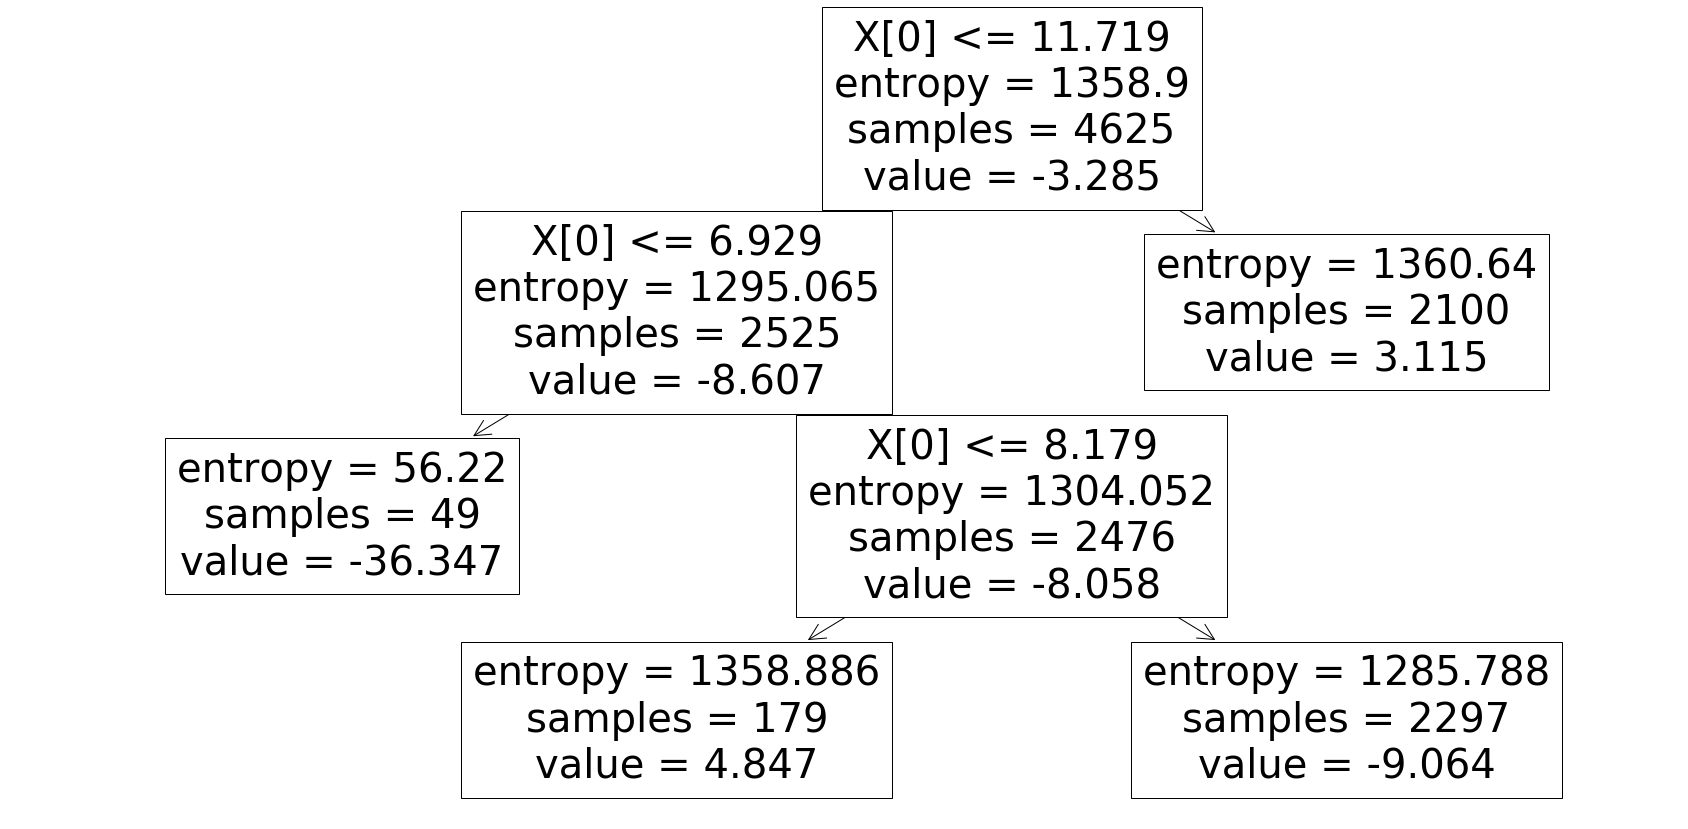

In [35]:
plt.figure(figsize=(30,15))
tree.plot_tree(cart_tuned);

In [21]:
cart_tuned.fit(X_test,y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=7, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=15,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [23]:
y_pred= cart_tuned.predict(X_test)

In [24]:
np.sqrt(mean_squared_error(y_test,y_pred))

35.8647452922358

TÜM X DEĞİŞKENLERİNİ KULLANARAK MODEL OLUŞTURALIM

In [40]:
y=df['90_target']
X=df.drop(['20_target','50_target','90_target'],axis=1)
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,GREEN,RED
0,19,17,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,2.0,-49.6,-54,-152,-353,1.0,0.498547,0.701906,1,0
1,24,19,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.8,-55.6,-60,-158,-359,1.0,0.537088,0.690833,1,0
2,30,24,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,2.7,-58.4,-60,-160,-362,1.0,0.615169,0.693040,1,0
3,37,30,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.9,-61.8,-65,-166,-367,1.0,0.661517,0.673418,1,0
4,41,37,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.1,-79.8,-86,-186,-388,1.0,0.747204,0.700522,1,0


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (3844, 134)
y_train (3844,)
X_test (1282, 134)
y_test (1282,)
training (5126, 137)


In [13]:
cart_model=DecisionTreeRegressor()

In [50]:
cart_model.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [52]:
#yalnızca ind_18 i kullanarak kurduğumuz modelde trainseti için  hata 22.51 
#aynı değişken için model_turnıng den sonra train seti için hata 35.78
#aynı değişken ve aynı modelin test datasının hatası 36.44
#tüm x leri kullandığımızda hata oranı neredeyse 0.0001
y_pred=cart_model.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred))

0.00011388203477664739

MODEL TUNING

In [81]:
#cart_model = DecisionTreeRegressor()
#cart_model.fit(X_train, y_train)

In [82]:
cart_params = {"min_samples_split": range(10,50),
               "min_samples_leaf": [10,15,20],
               "max_leaf_nodes": range(4,8)}

In [83]:
cart_cv_model=GridSearchCV(cart_model,cart_params,cv=10)

In [84]:
cart_cv_model.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=None,
                                             max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort=False, random_state=None,
                                             splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_leaf_nodes': range(4, 8),
                         'min_samples_leaf': [10, 15, 20],
                         'min_samples_split': range(10, 50)},
             pre_dispatch='2*n_job

In [85]:
cart_cv_model.best_params_

{'max_leaf_nodes': 7, 'min_samples_leaf': 15, 'min_samples_split': 10}

In [106]:
cart_tuned=DecisionTreeRegressor(max_leaf_nodes=7,min_samples_leaf=10,min_samples_split=8)

In [107]:
cart_tuned.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=7, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [108]:
y_pred= cart_tuned.predict(X_train)

In [109]:
np.sqrt(mean_squared_error(y_train,y_pred))

35.783170241393776

In [110]:
cart_tuned.fit(X_test,y_test)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=7, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=10,
                      min_samples_split=8, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [112]:
y_pred= cart_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test,y_pred))

35.8647452922358

In [ ]:
#yalnızca ind_18 i kullanarak kurduğumuz modelde trainseti için  hata 22.51 
#aynı değişken için model_turnıng den sonra train seti için hata 35.78
#aynı değişken ve aynı modelin test datasının hatası 36.44
#tüm x leri kullandığımızda hata oranı neredeyse 0.0001
#tüm x ler için model tunıng ettiğimizde train data için hata 35.78
#tüm x ler için model tunıng ettiğimizde test data için hata 35.86

# RANDOM FOREST

Birden çok karar ağacı oluşturur ve bunların tahminlerini bir araya getirir değerlendirir.
Her bir ağaçtan tahmin değerleri alınırken ağacın hata oranlarına bakılarak ağaçlara ağırlık verilir.İsabetli(hata oranı düşük)
tahminlere daha yüksek ağırlıklar veriri.
Değişkenleri rasgele seçer ve seçilen değişkenler için farklı karar ağaçları oluşturur.


MODEL

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
rf_model=RandomForestRegressor()

In [17]:
rf_model.fit(X_train,y_train)

C:\Users\karde\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

TAHMİN

In [18]:
y_pred=rf_model.predict(X_train)
np.sqrt(mean_squared_error(y_train,y_pred))

6.7334034745699185

In [19]:
#print(skompile(rf_model.predict).to('python/code'))

MODEL TUNING

In [143]:
rf_model

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [20]:
rf_params = {"max_depth": [2,5,8,10],
             "max_features": [25,50,100],
             "min_samples_split": [5,10],
             "n_estimators" : [100, 200, 500]}

In [21]:
rf_model = RandomForestRegressor()

In [22]:
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2)
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 20.2min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 59.7min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 81.6min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [2, 5, 8, 10],
    

In [23]:
rf_cv_model.best_params_

{'max_depth': 10,
 'max_features': 100,
 'min_samples_split': 5,
 'n_estimators': 200}

In [30]:
rf_tuned = RandomForestRegressor(max_depth  = 10, 
                                 max_features = 100, 
                                 n_estimators =200,
                                 min_samples_split=5)

In [31]:
rf_tuned.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
                      max_features=100, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=200,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [33]:
y_pred= rf_tuned.predict(X_train)

In [35]:
np.sqrt(mean_squared_error(y_train, y_pred))

10.201654913430886

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5126 entries, 0 to 6166
Columns: 137 entries, ind_5 to RED
dtypes: float64(90), int64(47)
memory usage: 5.4 MB


# YAPAY SİNİR AĞLARI (ÇOK KATMANLI ALGILAYICILAR)

In [ ]:
Sınıflandırma ve regresyon problemleri için kullanılabilir.Özellikle Doğrusal olmayan regresyon problemlerinde çok etkilidir
Girdiler ağırlıklandırılarak toplam fonksiyon elde edilir , bunlardan eşik değer ve çıktı elde edilir.
OverFitting meyillidir. Bunun olmaması için regresyon katsayılarına ceza parametreleri eklenerek katsayılar bulunur.
Veri dönüştürme işlemini tüm algoritmalar sever ancak YSA daha hassas olduğu için modelden önce standartlaştırma yapılmasıgerekir

In [39]:
#datayı standartlaştımak için kullanacağımız kütüphane
from sklearn.preprocessing import StandardScaler

In [40]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

print("X_train", X_train.shape)

print("y_train",y_train.shape)

print("X_test",X_test.shape)

print("y_test",y_test.shape)

training = df.copy()

print("training", training.shape)

X_train (3844, 134)
y_train (3844,)
X_test (1282, 134)
y_test (1282,)
training (5126, 137)


In [42]:
#yapay sinir ağı modeli kurmak için kullandığımız kütüphane
from sklearn.neural_network import MLPRegressor

In [43]:
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train, y_train)

C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


TAHMİN

In [44]:
y_pred = mlp_model.predict(X_train)

In [45]:
np.sqrt(mean_squared_error(y_train, y_pred))

9.207901854843017

MODEL TUNING

In [46]:
mlp_params = {'alpha': [0.1, 0.01,0.02,0.005],
             'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
             'activation': ['relu','logistic']}

In [47]:
mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 10)

In [48]:
mlp_cv_model.fit(X_train, y_train)

C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\karde\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, Converge

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=MLPRegressor(activation='relu', alpha=0.0001,
                                    batch_size='auto', beta_1=0.9, beta_2=0.999,
                                    early_stopping=False, epsilon=1e-08,
                                    hidden_layer_sizes=(100, 20),
                                    learning_rate='constant',
                                    learning_rate_init=0.001, max_iter=200,
                                    momentum=0.9, n_iter_no_change=10,
                                    nesterovs_momentum=True, power_t=0.5,
                                    random_state=None, shuffle=True,
                                    solver='adam', tol=0.0001,
                                    validation_fraction=0.1, verbose=False,
                                    warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'activation': ['relu', 'logistic'],
             

In [49]:
mlp_cv_model.best_params_

{'activation': 'relu', 'alpha': 0.02, 'hidden_layer_sizes': (300, 200, 150)}

In [52]:
mlp_tuned = MLPRegressor(alpha = 0.02, hidden_layer_sizes = (300,200,150))

In [53]:
mlp_tuned.fit(X_train, y_train)

MLPRegressor(activation='relu', alpha=0.02, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(300, 200, 150), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [59]:
y_pred = mlp_tuned.predict(X_train)

In [61]:
np.sqrt(mean_squared_error(y_train, y_pred))

29.999633419686752

In [62]:
mlp_tuned.fit(X_test, y_test)

MLPRegressor(activation='relu', alpha=0.02, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(300, 200, 150), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

In [63]:
y_pred = mlp_tuned.predict(X_test)

In [64]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.395065135144801